In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle"
)

# Read File

In [251]:
# Training Set
context = pd.read_csv('../cleaned/train/context.csv')
mpa = pd.read_csv('../cleaned/train/mpa.csv')
mpu = pd.read_csv('../cleaned/train/mpu.csv')
user = pd.read_csv('../cleaned/train/user.csv')
train_set = {'user': user,'context': context, 'mpa': mpa, 'mpu': mpu }


In [252]:
# Testing Set
context_test = pd.read_csv('../cleaned/test/context.csv')
mpa_test = pd.read_csv('../cleaned/test/mpa.csv')
mpu_test = pd.read_csv('../cleaned/test/mpu.csv')
user_test = pd.read_csv('../cleaned/test/user.csv')
test_set = {'user': user,'context': context, 'mpa': mpa, 'mpu': mpu }


In [253]:
user = user.drop(['Unnamed: 0'],axis = 1)
context = context.drop(['Unnamed: 0'],axis = 1)
mpa = mpa.drop(['Unnamed: 0'],axis = 1)
mpu = mpu.drop(['Unnamed: 0'],axis = 1)

user_test = user_test.drop(['Unnamed: 0'],axis = 1)
context_test = context_test.drop(['Unnamed: 0'],axis = 1)
mpa_test = mpa_test.drop(['Unnamed: 0'],axis = 1)
mpu_test = mpu_test.drop(['Unnamed: 0'],axis = 1)


# EDA

### EDA DataFrame

In [254]:
eda_df = user.merge(context,on='id',how='left')
eda_df_test = user_test.merge(context_test,on='id',how='left')

In [255]:
eda_df.head()

,id,gender,age,education,profession,income,marital_status,continent,fb_freq,yt_freq,...,num_child,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,score,direction
0,11156,female,21,unknown,unemployed,lower-middle,single,oceania,0,0,...,2,travel,alone,sunny,afternoon,1,0,0,0,0
1,4297,other,22,unknown,unemployed,lower-middle,single,europe,0,0,...,2,travel,friends,sunny,morning,1,1,0,0,0
2,13301,female,24,unknown,unemployed,lower-middle,single,asia,0,0,...,1,travel,friends,sunny,afternoon,1,1,0,0,0
3,9920,female,24,unknown,unemployed,lower-middle,single,europe,0,0,...,1,travel,friends,sunny,afternoon,1,1,0,30,0
4,8424,female,25,unknown,unemployed,lower-middle,single,america,0,0,...,1,travel,family,sunny,morning,1,1,0,0,0


In [256]:
eda_df_test.head()

,id,gender,age,education,profession,income,marital_status,continent,fb_freq,yt_freq,...,num_child,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,score,direction
0,7067,female,33,postgrad,unemployed,middle,single,asia,0,1,...,1,travel,alone,sunny,afternoon,1,0,0,5,0
1,2114,female,34,postgrad,unemployed,middle,single,asia,0,1,...,1,travel,friends,sunny,afternoon,1,1,0,4,0
2,6582,female,34,postgrad,unemployed,middle,single,oceania,0,1,...,3,travel,family,sunny,morning,1,1,0,0,0
3,11379,female,34,postgrad,unemployed,middle,single,america,0,1,...,4,travel,family,sunny,afternoon,1,0,0,0,0
4,3986,female,34,postgrad,unemployed,middle,single,asia,0,1,...,1,travel,alone,sunny,evening,1,0,0,3,1


### Outliers

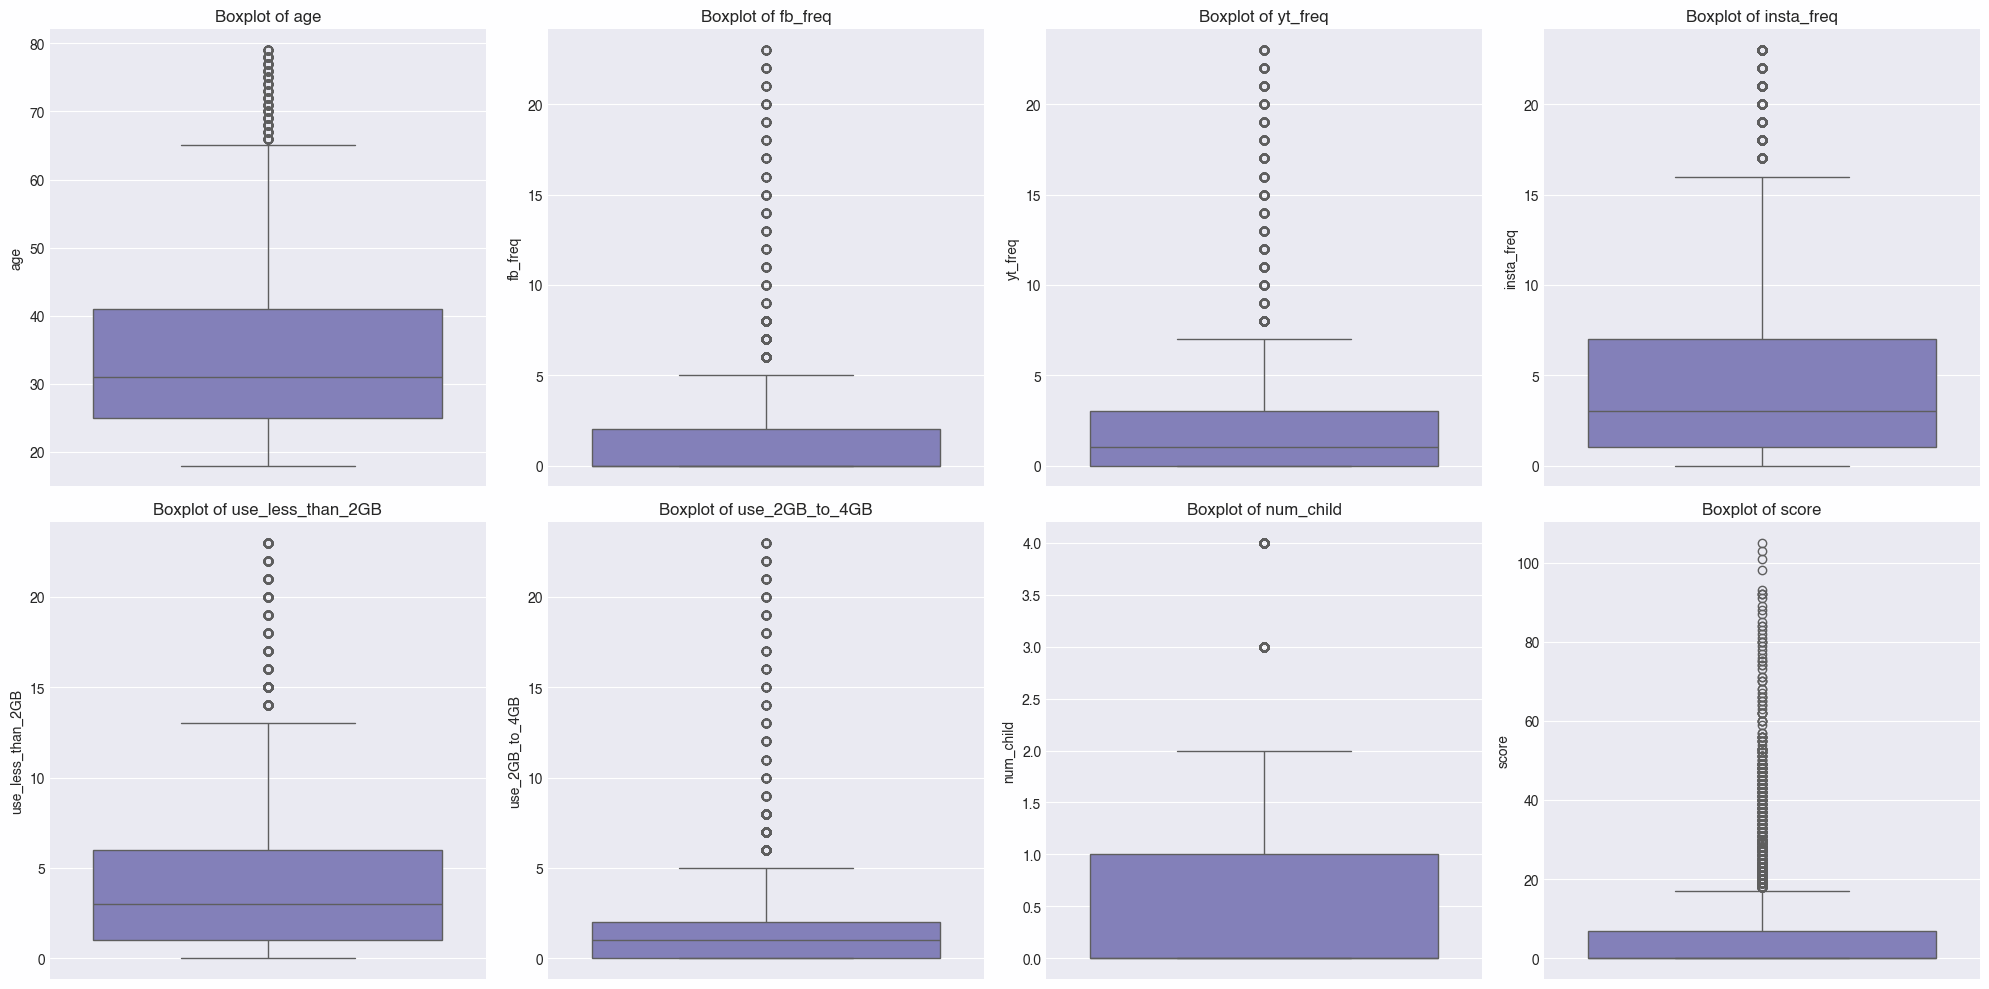

In [257]:

columns_to_plot = ['age', 'fb_freq', 'yt_freq', 'insta_freq', 'use_less_than_2GB', 'use_2GB_to_4GB', 'num_child', 'score']
temp_df = eda_df[columns_to_plot]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  

for i, ax in enumerate(axes.flatten()):
    if i < len(columns_to_plot):
        sns.boxplot(y=columns_to_plot[i], data=eda_df, ax=ax)  
        ax.set_title(f'Boxplot of {columns_to_plot[i]}')
        ax.set_ylabel(columns_to_plot[i])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


## Univariate Analysis

### Gender Distribution

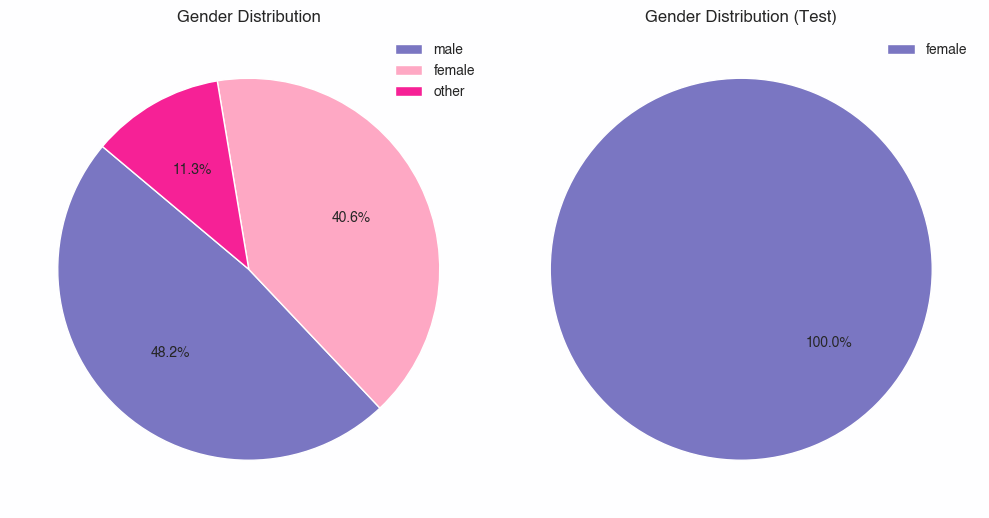

In [258]:

def pie_plot_chart(data,col,index,title):
    value_counts = data[col].value_counts()
    percentages = value_counts / value_counts.sum() * 100

    plt.subplot(1,2,index)
    plt.pie(percentages, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.legend(labels=percentages.index, loc='upper right')
    



plt.figure(figsize= (10,10))

pie_plot_chart(eda_df,'gender',1,'Gender Distribution')
pie_plot_chart(eda_df_test,'gender',2,'Gender Distribution (Test)')
plt.tight_layout()  
plt.show()
    

### Age Distribution

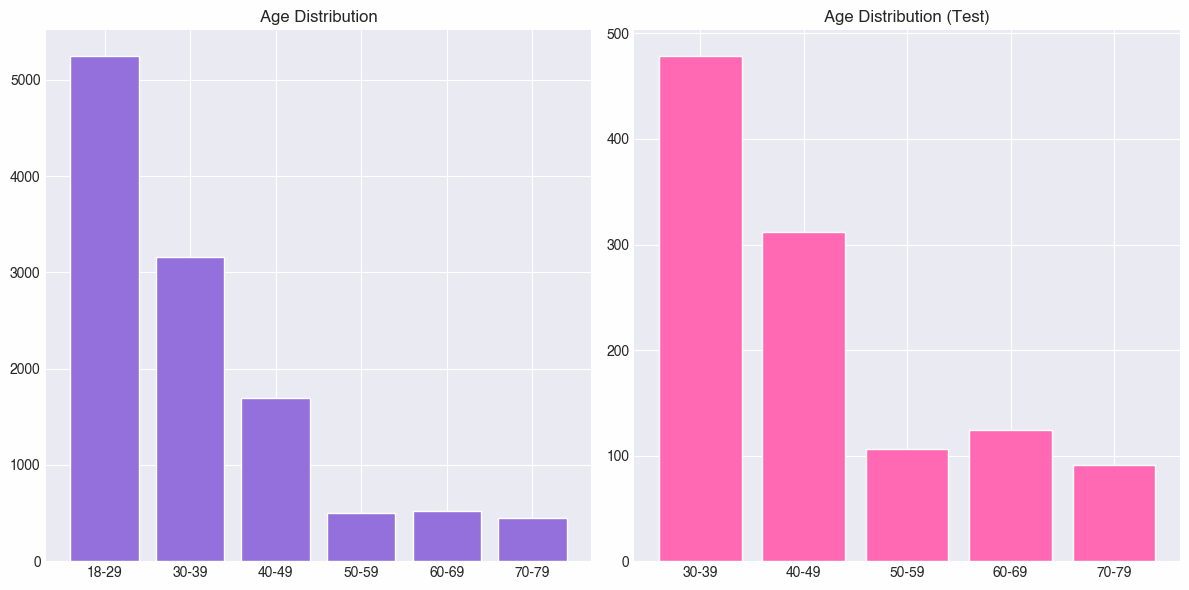

In [259]:
def covert_age_group(x):
    if x <= 29:
        return '18-29'
    elif x <= 39:
        return '30-39'
    elif x <= 49:
        return '40-49'
    elif x <= 59:
        return '50-59'
    elif x <= 69:
        return '60-69'
    else:
        return '70-79'
    
def bar_plot_chart(df,col,index,title):
    color =''
    if index == 1:
        color = 'mediumpurple'
    else:
        color = 'hotpink'
    if col == 'age':
        value = df[col].apply(covert_age_group).value_counts().sort_index()
    elif col =='income':
        income_order = ['lower', 'lower-middle', 'middle', 'upper-middle', 'upper', 'extreme upper']
        df[col] = pd.Categorical(df[col], categories=income_order, ordered=True)
        value = df[col].value_counts().sort_index()
    elif col == 'continent':
        continent_order = ['europe', 'america', 'asia', 'oceania']
        df[col] = pd.Categorical(df[col], categories=continent_order, ordered=True)
        value = df[col].value_counts().sort_index()
        
    plt.subplot(1,2,index)
    plt.bar(value.index,value,color = color)
    plt.title(title)

plt.figure(figsize= (12,6))

bar_plot_chart(eda_df,'age',1,'Age Distribution')
bar_plot_chart(eda_df_test,'age',2,'Age Distribution (Test)')
plt.tight_layout()  
plt.show()

### Education Distribution

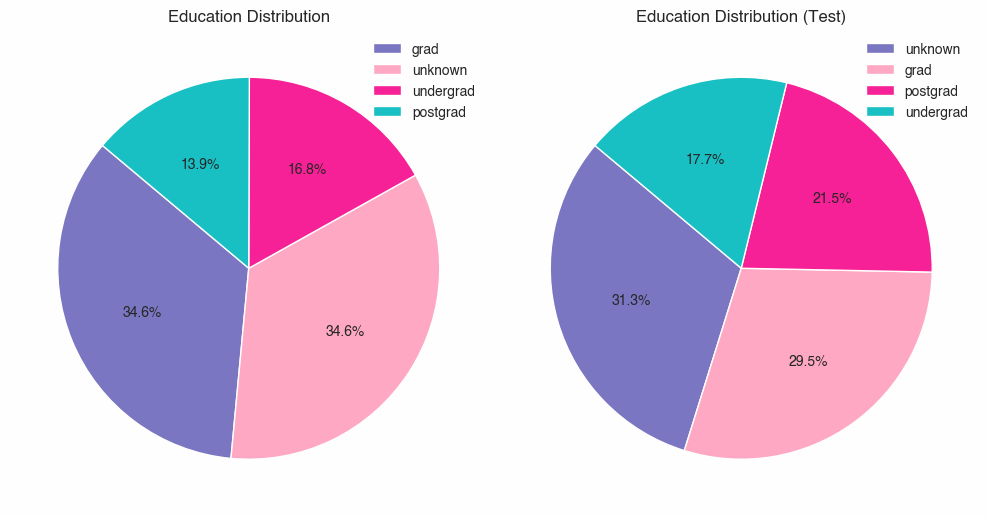

In [260]:

plt.figure(figsize= (10,10))
pie_plot_chart(eda_df,'education',1,'Education Distribution')
pie_plot_chart(eda_df_test,'education',2,'Education Distribution (Test)')
plt.tight_layout()  
plt.show()


### Profession Distribution

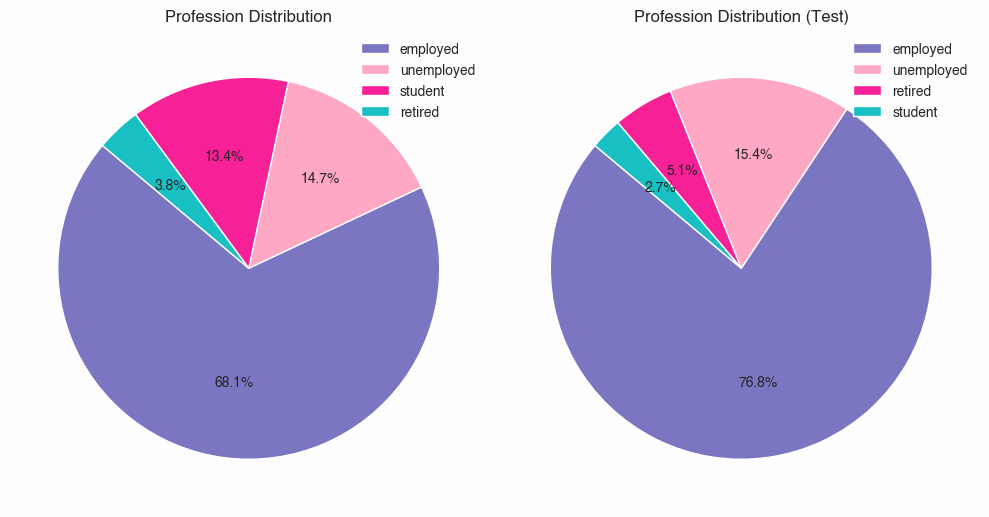

In [261]:

plt.figure(figsize= (10,10))
pie_plot_chart(eda_df,'profession',1,'Profession Distribution')
pie_plot_chart(eda_df_test,'profession',2,'Profession Distribution (Test)')
plt.tight_layout()  
plt.show()


### Income Class Distribution

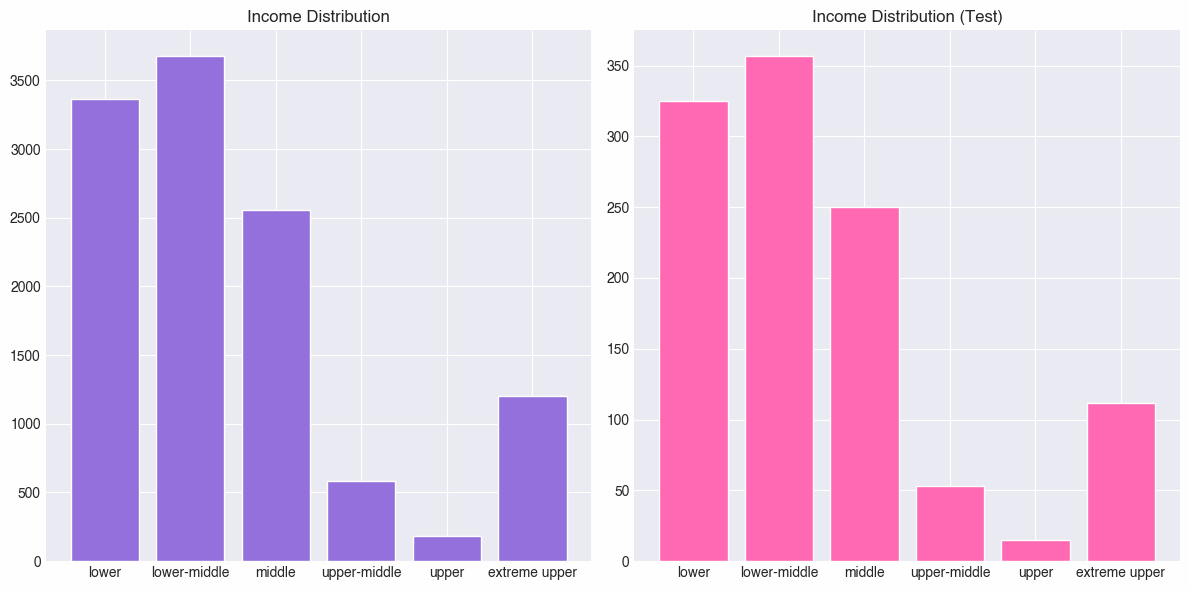

In [262]:

plt.figure(figsize= (12,6))
bar_plot_chart(eda_df,'income',1,'Income Distribution')
bar_plot_chart(eda_df_test,'income',2,'Income Distribution (Test)')
plt.tight_layout()  
plt.show()


### Continent Distribution

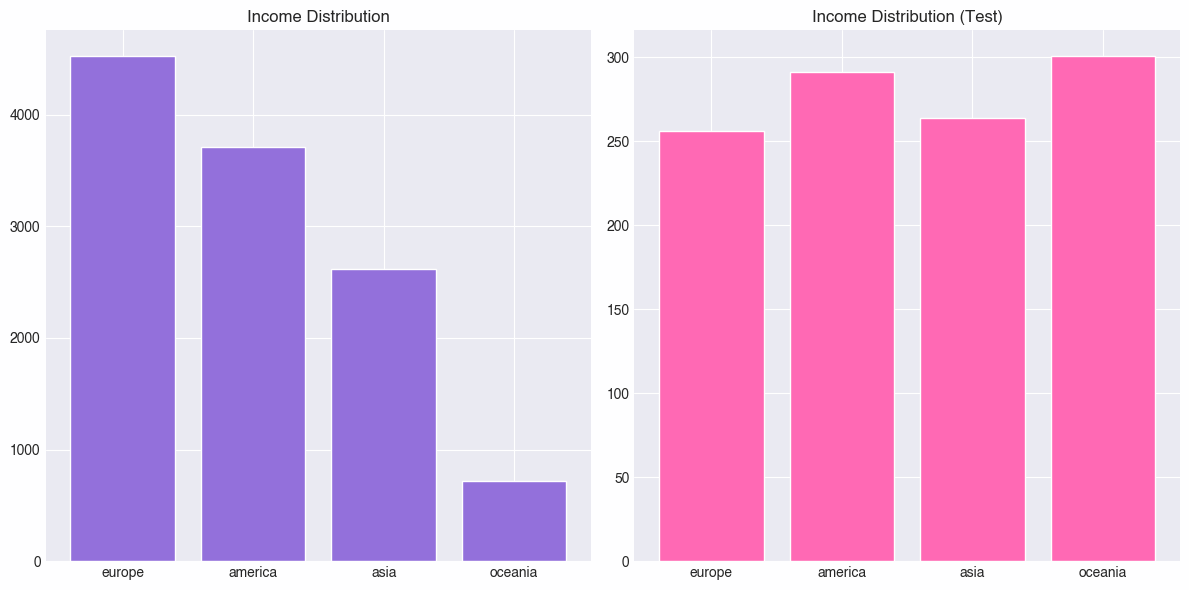

In [263]:

plt.figure(figsize= (12,6))
bar_plot_chart(eda_df,'continent',1,'Income Distribution')
bar_plot_chart(eda_df_test,'continent',2,'Income Distribution (Test)')
plt.tight_layout()  
plt.show()


### Martial Status

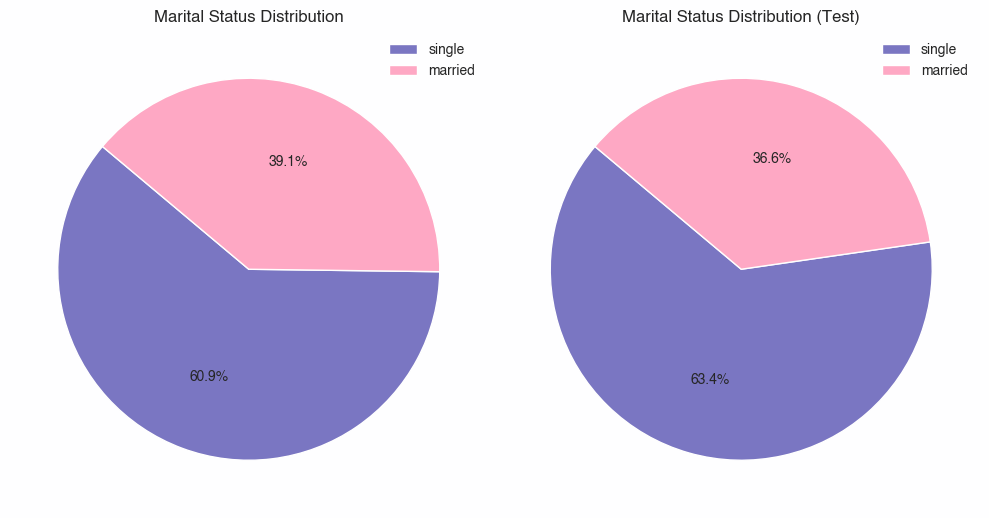

In [265]:

plt.figure(figsize= (10,10))
pie_plot_chart(eda_df,'marital_status',1,'Marital Status Distribution')
pie_plot_chart(eda_df_test,'marital_status',2,'Marital Status Distribution (Test)')
plt.tight_layout()  
plt.show()

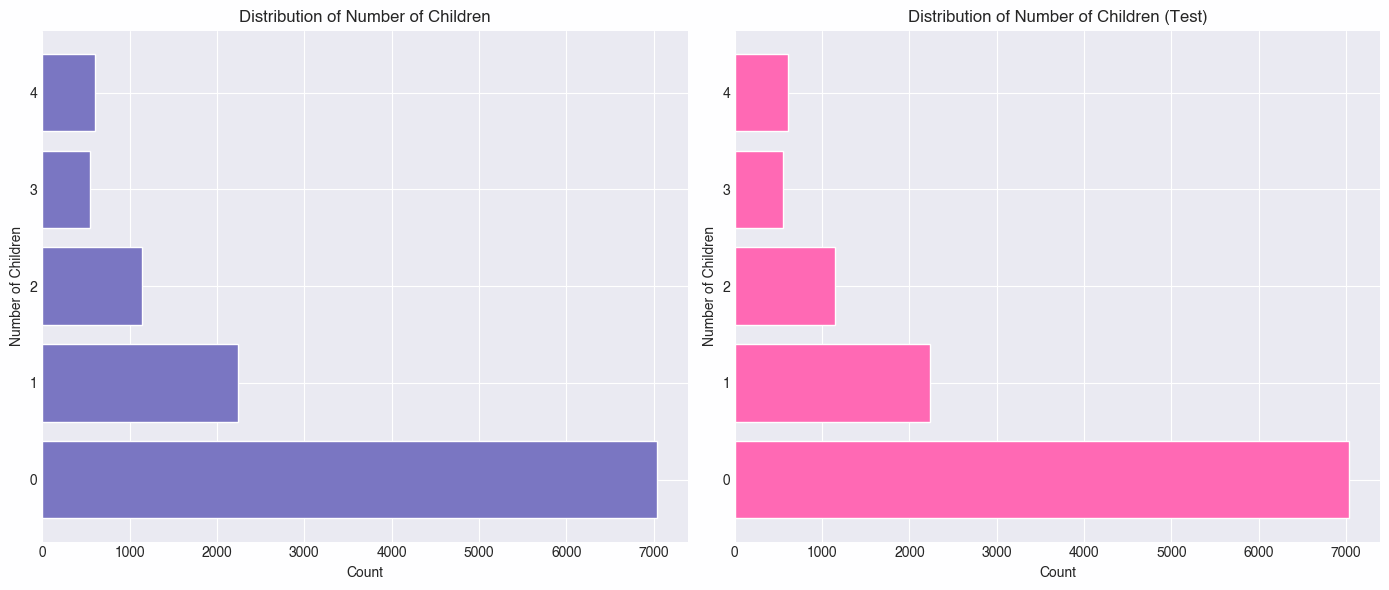

In [266]:
eda_df_count = eda_df['num_child'].value_counts()
eda_df_test_count = eda_df_test['num_child'].value_counts()


fig,ax = plt.subplots(1, 2, figsize=(14, 6)) 
ax[0].barh(eda_df_count.index, eda_df_count)
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Number of Children')
ax[0].set_title('Distribution of Number of Children')

ax[1].barh(eda_df_count.index, eda_df_count, color='hotpink')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Number of Children')
ax[1].set_title('Distribution of Number of Children (Test)')

plt.tight_layout()
plt.show()



### Go_with

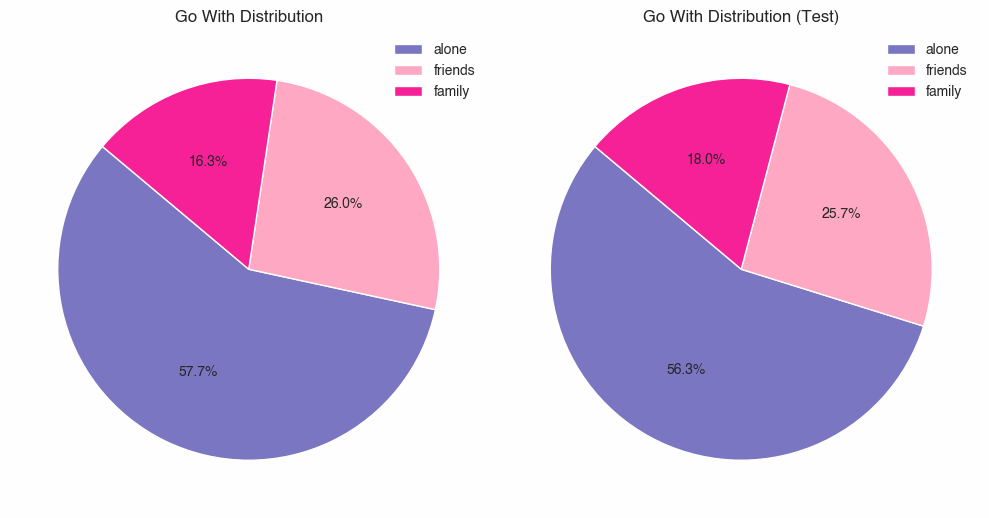

In [267]:

plt.figure(figsize= (10,10))
pie_plot_chart(eda_df,'go_with',1,'Go With Distribution')
pie_plot_chart(eda_df_test,'go_with',2,'Go With Distribution (Test)')
plt.tight_layout()  
plt.show()

### Purpose

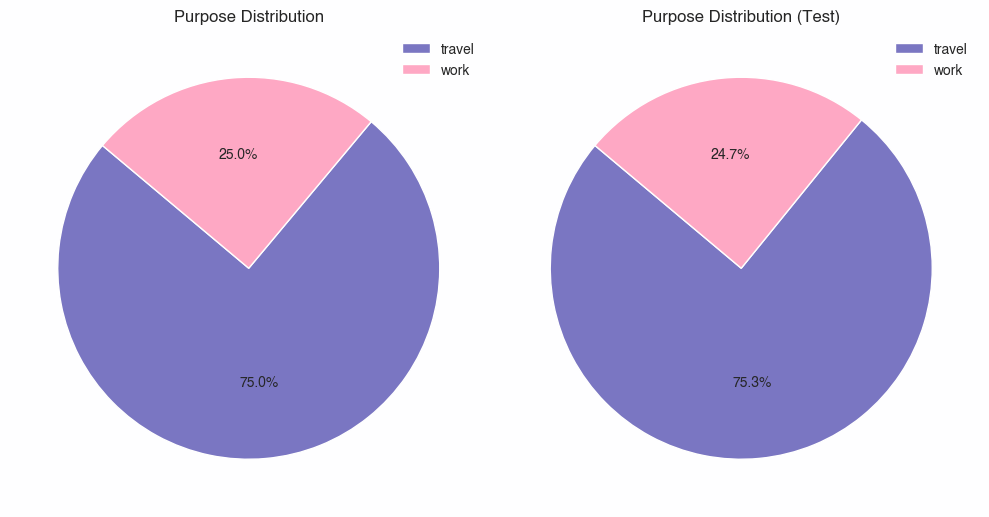

In [268]:

plt.figure(figsize= (10,10))
pie_plot_chart(eda_df,'purpose',1,'Purpose Distribution')
pie_plot_chart(eda_df_test,'purpose',2,'Purpose Distribution (Test)')
plt.tight_layout()  
plt.show()

### Weather

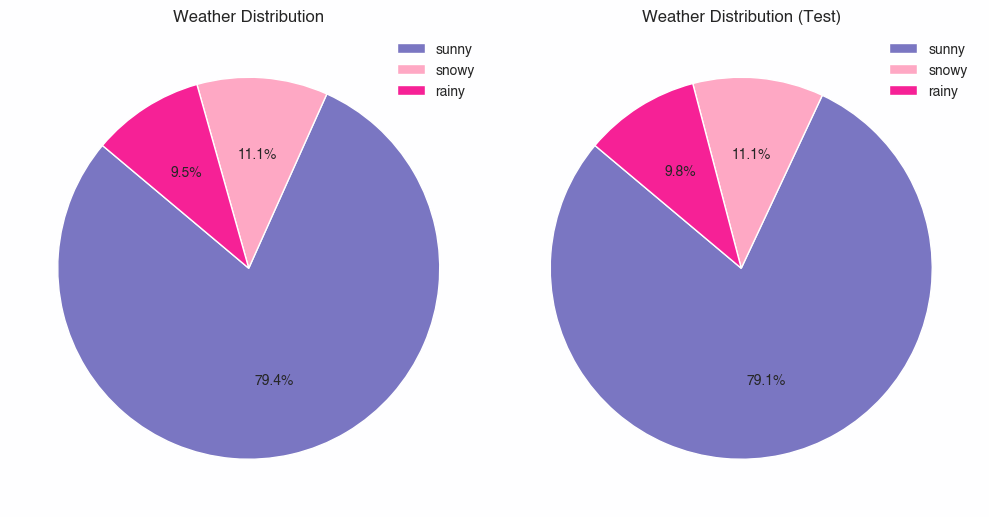

In [269]:

plt.figure(figsize= (10,10))
pie_plot_chart(eda_df,'weather',1,'Weather Distribution')
pie_plot_chart(eda_df_test,'weather',2,'Weather Distribution (Test)')
plt.tight_layout()  
plt.show()

### Time

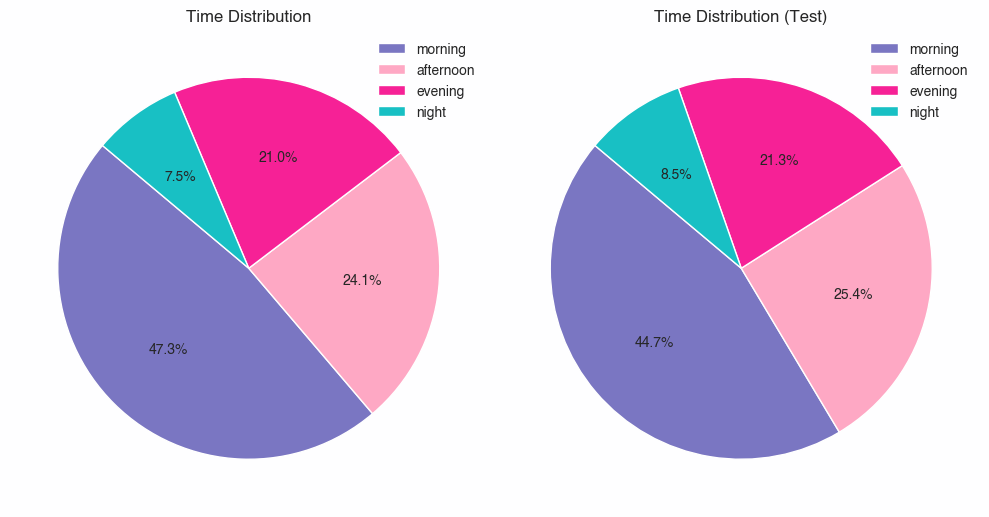

In [270]:

plt.figure(figsize= (10,10))
pie_plot_chart(eda_df,'time',1,'Time Distribution')
pie_plot_chart(eda_df_test,'time',2,'Time Distribution (Test)')
plt.tight_layout()  
plt.show()

### Destination

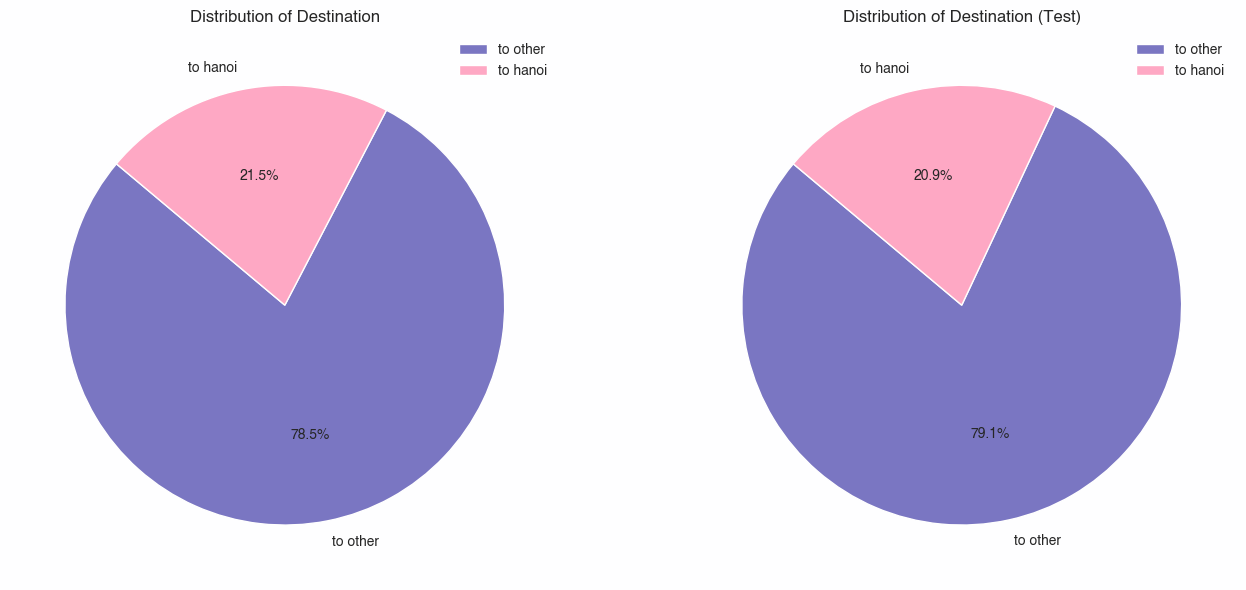

In [271]:
direction_labels = {0: 'to other', 1: 'to hanoi'}

eda_df_count = eda_df['direction'].replace(direction_labels).value_counts()
eda_df_test_count = eda_df_test['direction'].replace(direction_labels).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(eda_df_count, labels=eda_df_count.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Distribution of Destination')
ax[0].legend(eda_df_count.index, loc='upper right')

ax[1].pie(eda_df_test_count, labels=eda_df_test_count.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of Destination (Test)')
ax[1].legend(eda_df_test_count.index, loc='upper right')

plt.tight_layout()
plt.show()


### Accepted Rate

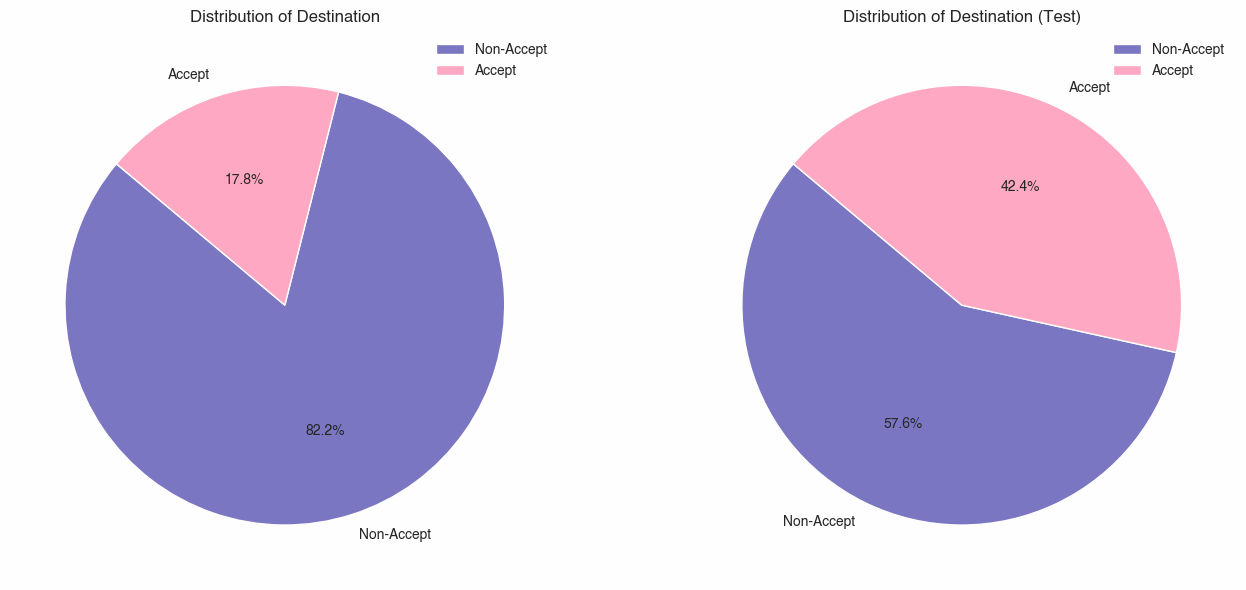

In [272]:
labels = {0: 'Non-Accept', 1: 'Accept'}

count = mpu['accept'].replace(labels).value_counts()
count_test = mpu_test['accept'].replace(labels).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Distribution of Destination')
ax[0].legend(count.index, loc='upper right')

ax[1].pie(count_test, labels=count_test.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of Destination (Test)')
ax[1].legend(count_test.index, loc='upper right')

plt.tight_layout()
plt.show()


## Multivariate Analysis


### Age x Income level x Gender 

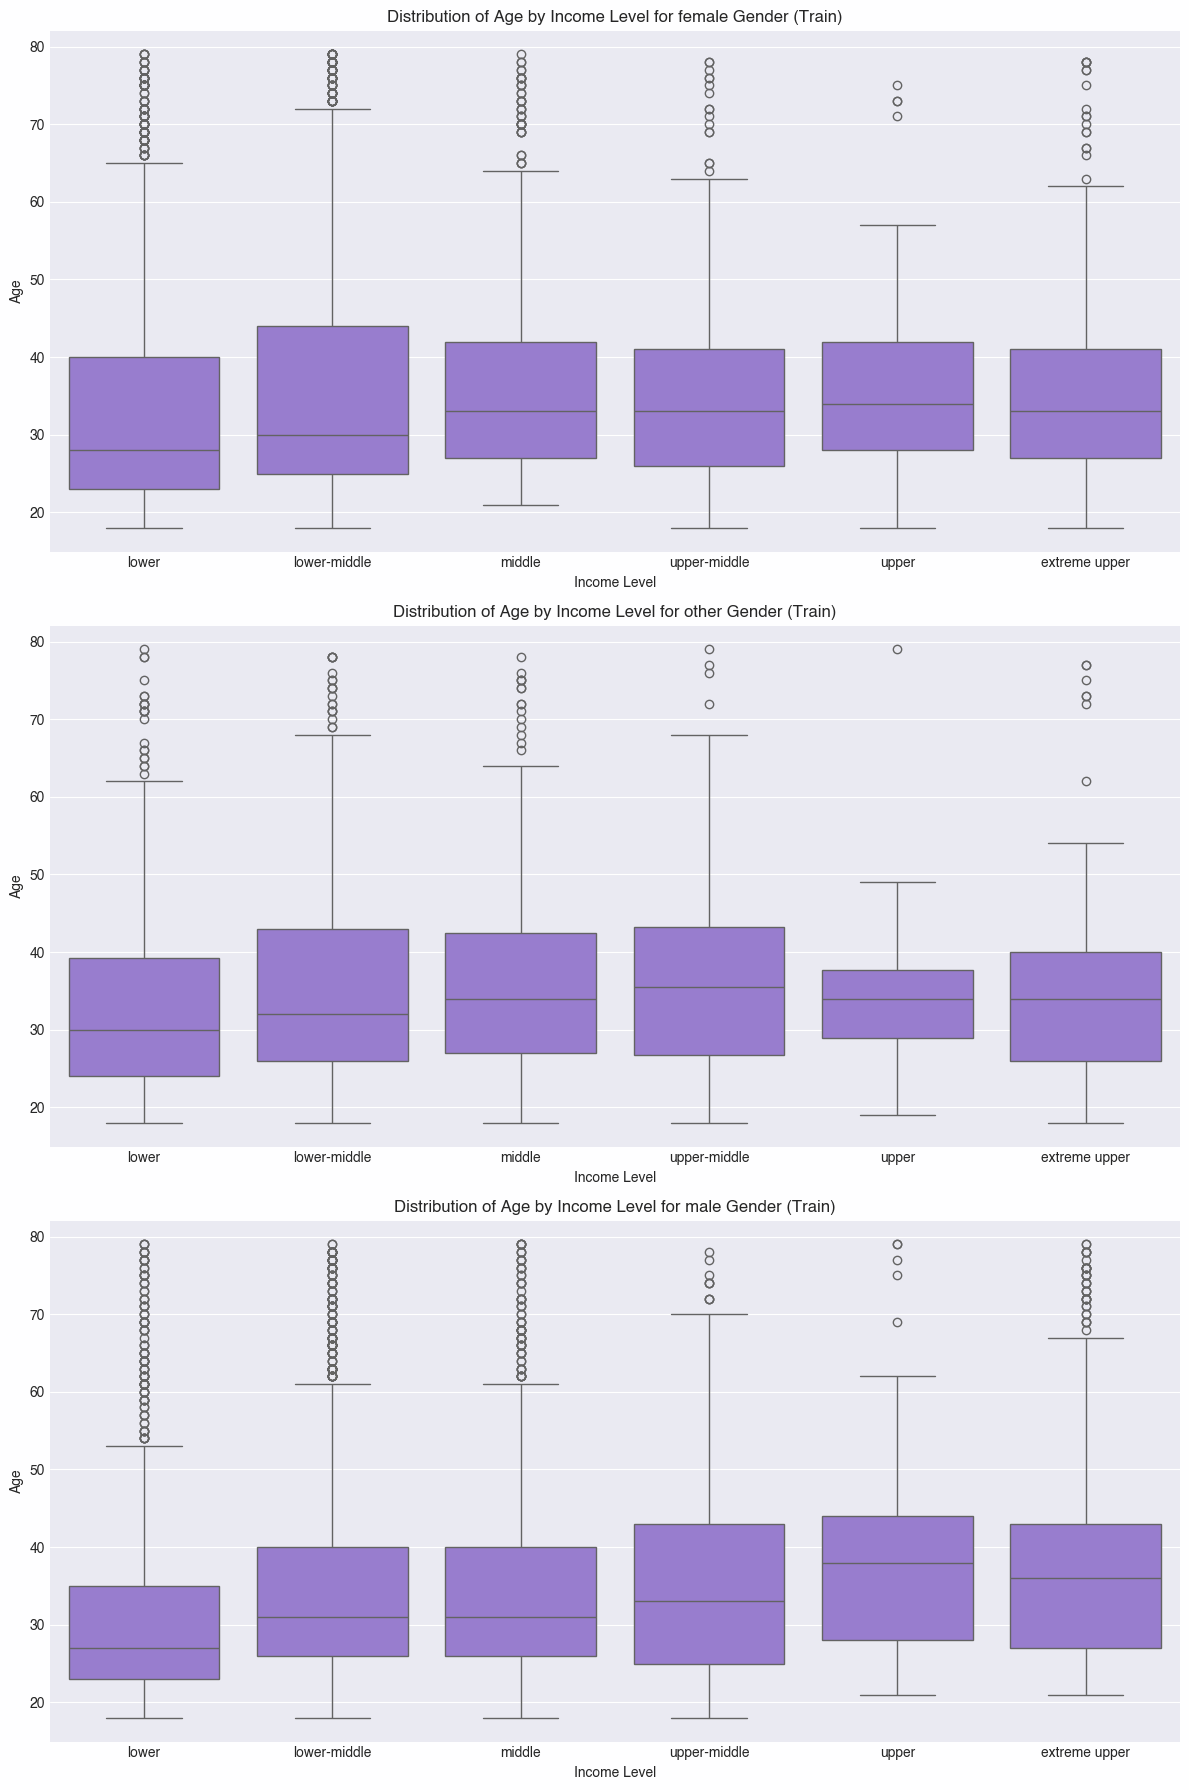

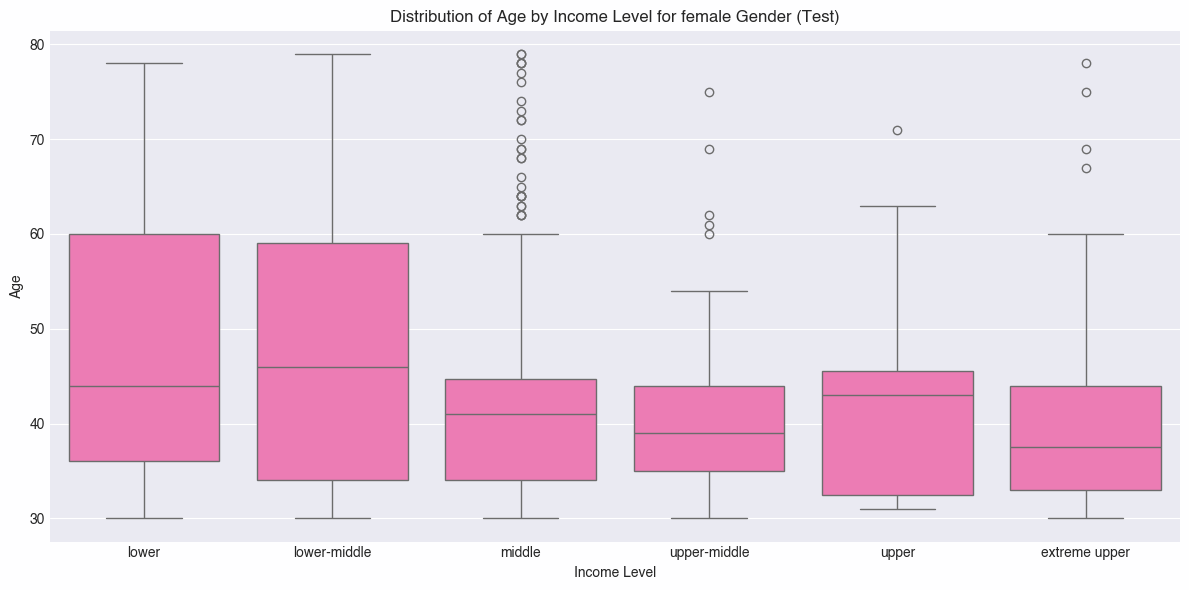

In [273]:

income_order = ['lower', 'lower-middle', 'middle', 'upper-middle', 'upper', 'extreme upper']
eda_df['income'] = pd.Categorical(eda_df['income'], categories=income_order, ordered=True)
eda_df_test['income'] = pd.Categorical(eda_df_test['income'], categories=income_order, ordered=True)


def plot_gender_boxplots(df, title_suffix=""):
    genders = df['gender'].unique()
    fig, axes = plt.subplots(len(genders), 1, figsize=(12, len(genders) * 6)) 
    box_color = 'hotpink' if len(genders) == 1 else 'mediumpurple'
    if len(genders) == 1:
        axes = [axes] 

    for ax, gender in zip(axes, genders):
        sns.boxplot(x='income', y='age', data=df[df['gender'] == gender], 
                    order=income_order, ax=ax,color = box_color)
        ax.set_title(f'Distribution of Age by Income Level for {gender} Gender {title_suffix}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Income Level')
        ax.set_ylabel('Age')

    plt.tight_layout()
    plt.show()


plot_gender_boxplots(eda_df, "(Train)")

plot_gender_boxplots(eda_df_test, "(Test)")


### Continent x Income level

In [274]:
def count_plot_by_income(eda_df, eda_df_test, x):
    income_order = ['lower', 'lower-middle', 'middle', 'upper-middle', 'upper', 'extreme upper']
    category_orders = {
        'continent': ['europe', 'america', 'asia', 'oceania'],
        'education': ['unknown', 'undergrad', 'grad', 'postgrad'],
        'profession': ['unemployed', 'student', 'employed', 'retired']
    }
    
    order = category_orders.get(x, None)
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    sns.countplot(data=eda_df, x=x, hue='income', hue_order=income_order, order=order, ax=ax[0])
    ax[0].set_xlabel(x.capitalize())
    ax[0].set_ylabel('Count')
    ax[0].set_title(f'Distribution of Income Level by {x.capitalize()} (Train)')
    ax[0].legend(title='Income Level')

    sns.countplot(data=eda_df_test, x=x, hue='income', hue_order=income_order, order=order, ax=ax[1])
    ax[1].set_xlabel(x.capitalize())
    ax[1].set_ylabel('Count')
    ax[1].set_title(f'Distribution of Income Level by {x.capitalize()} (Test)')
    ax[1].legend(title='Income Level', loc='upper right')

    plt.tight_layout()
    plt.show()




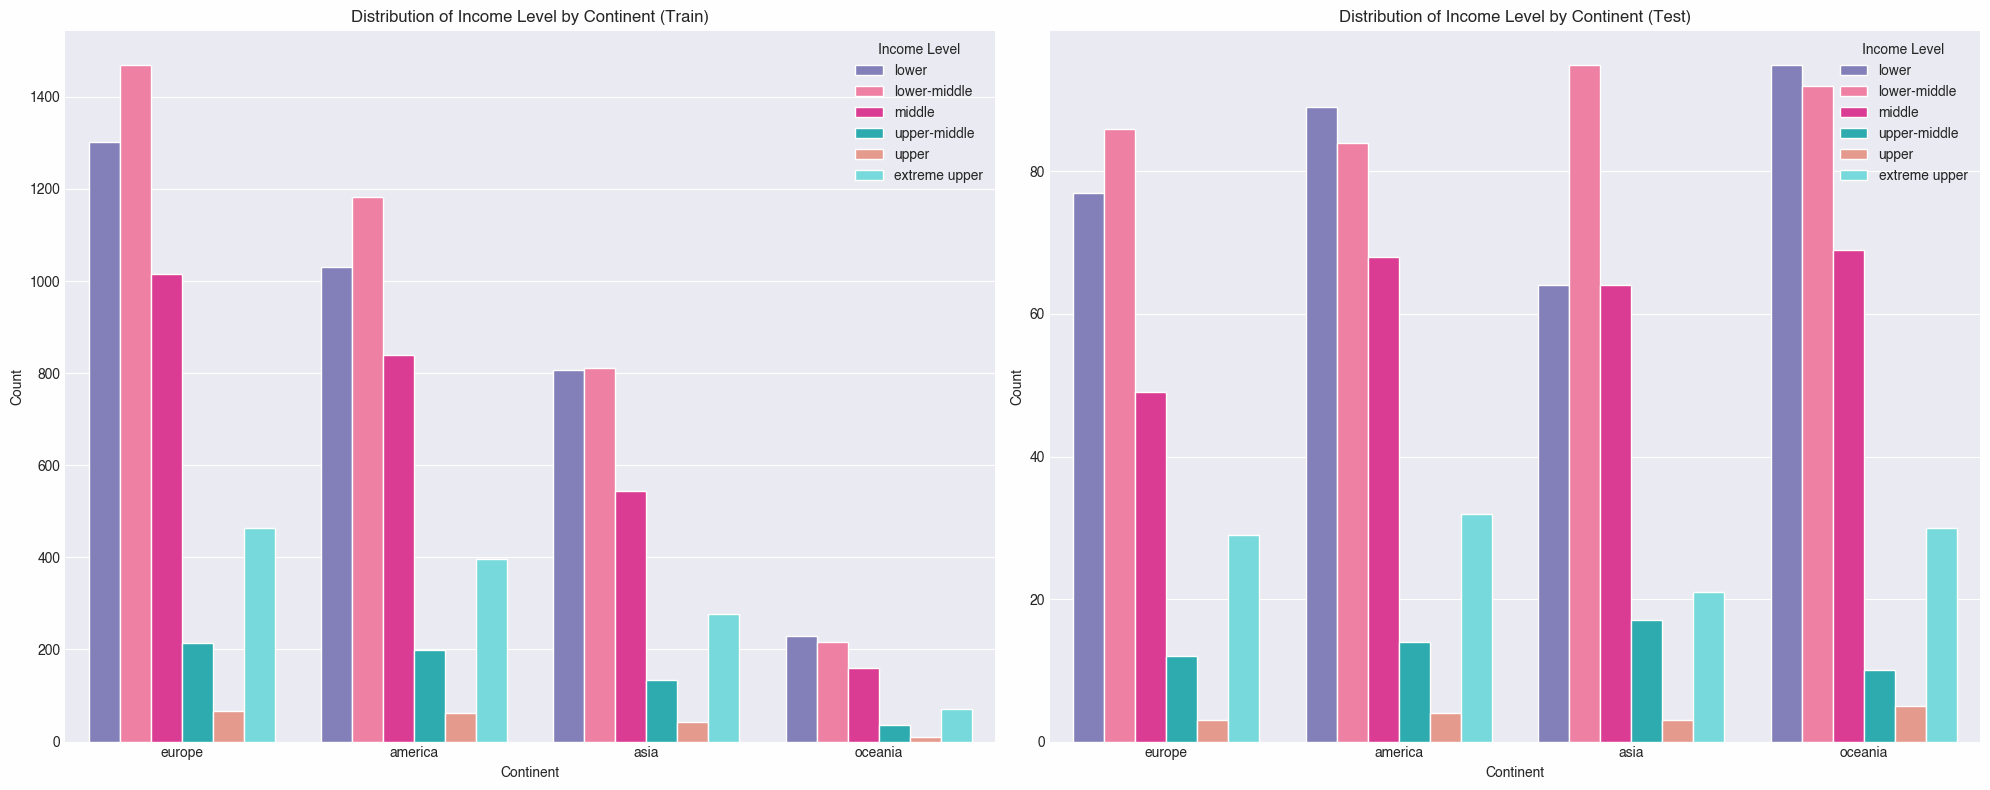

In [275]:
count_plot_by_income(eda_df, eda_df_test, 'continent')

### Education x Income level

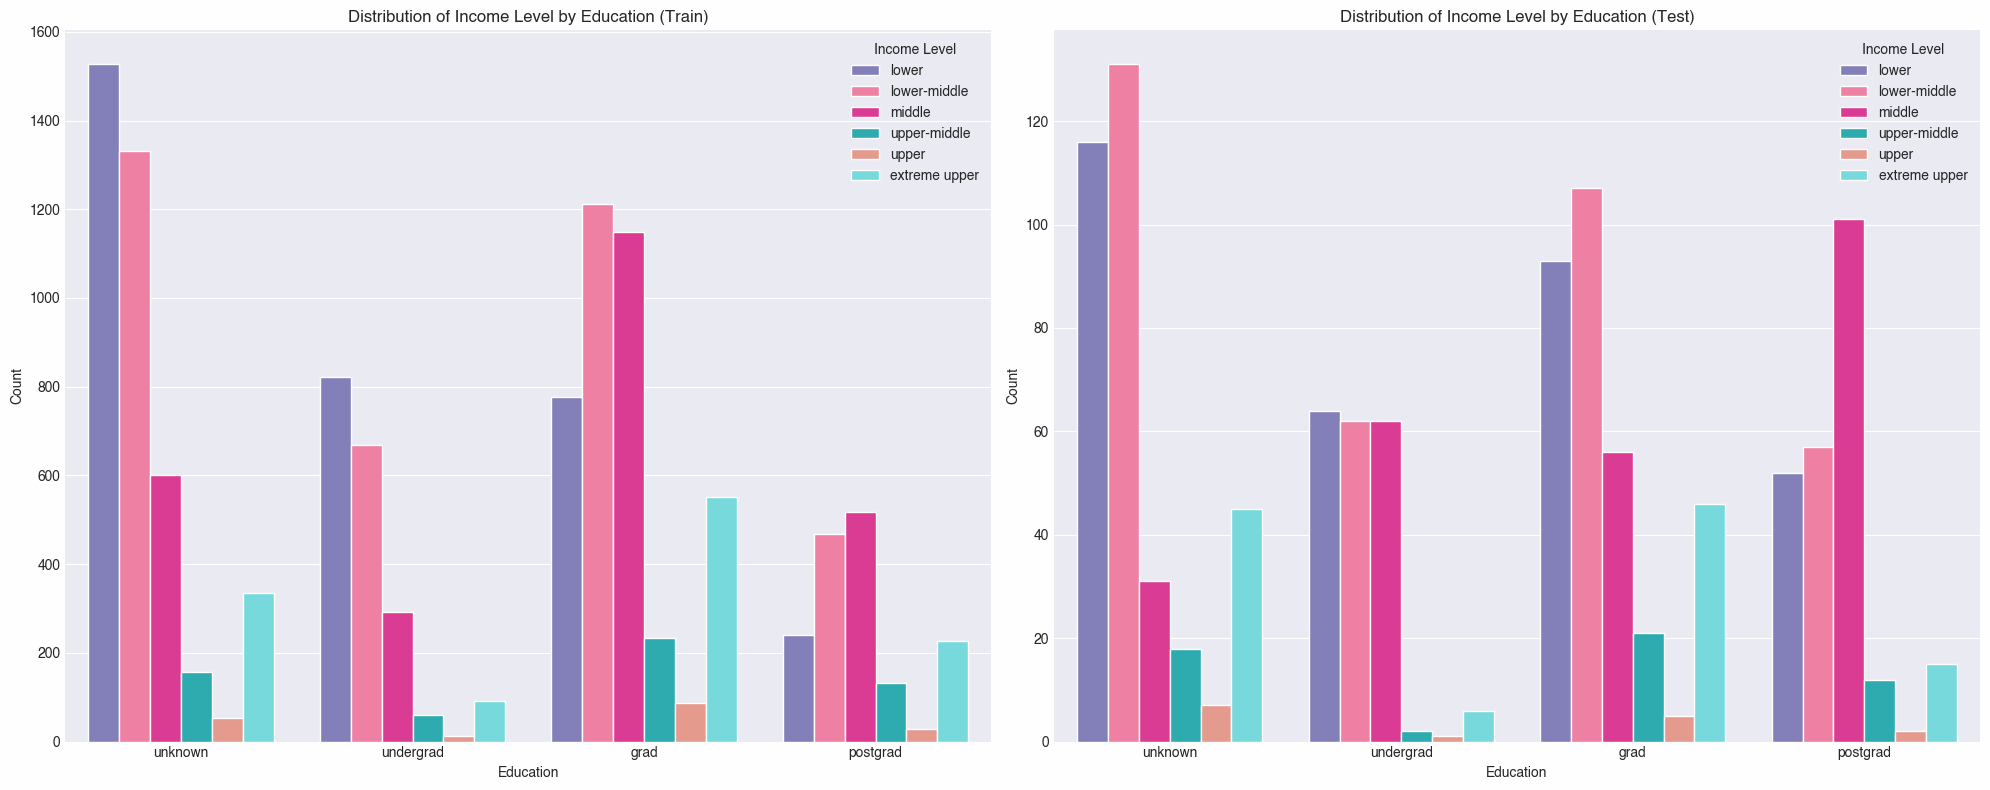

In [276]:
count_plot_by_income(eda_df, eda_df_test, 'education')

### Profession x Income level

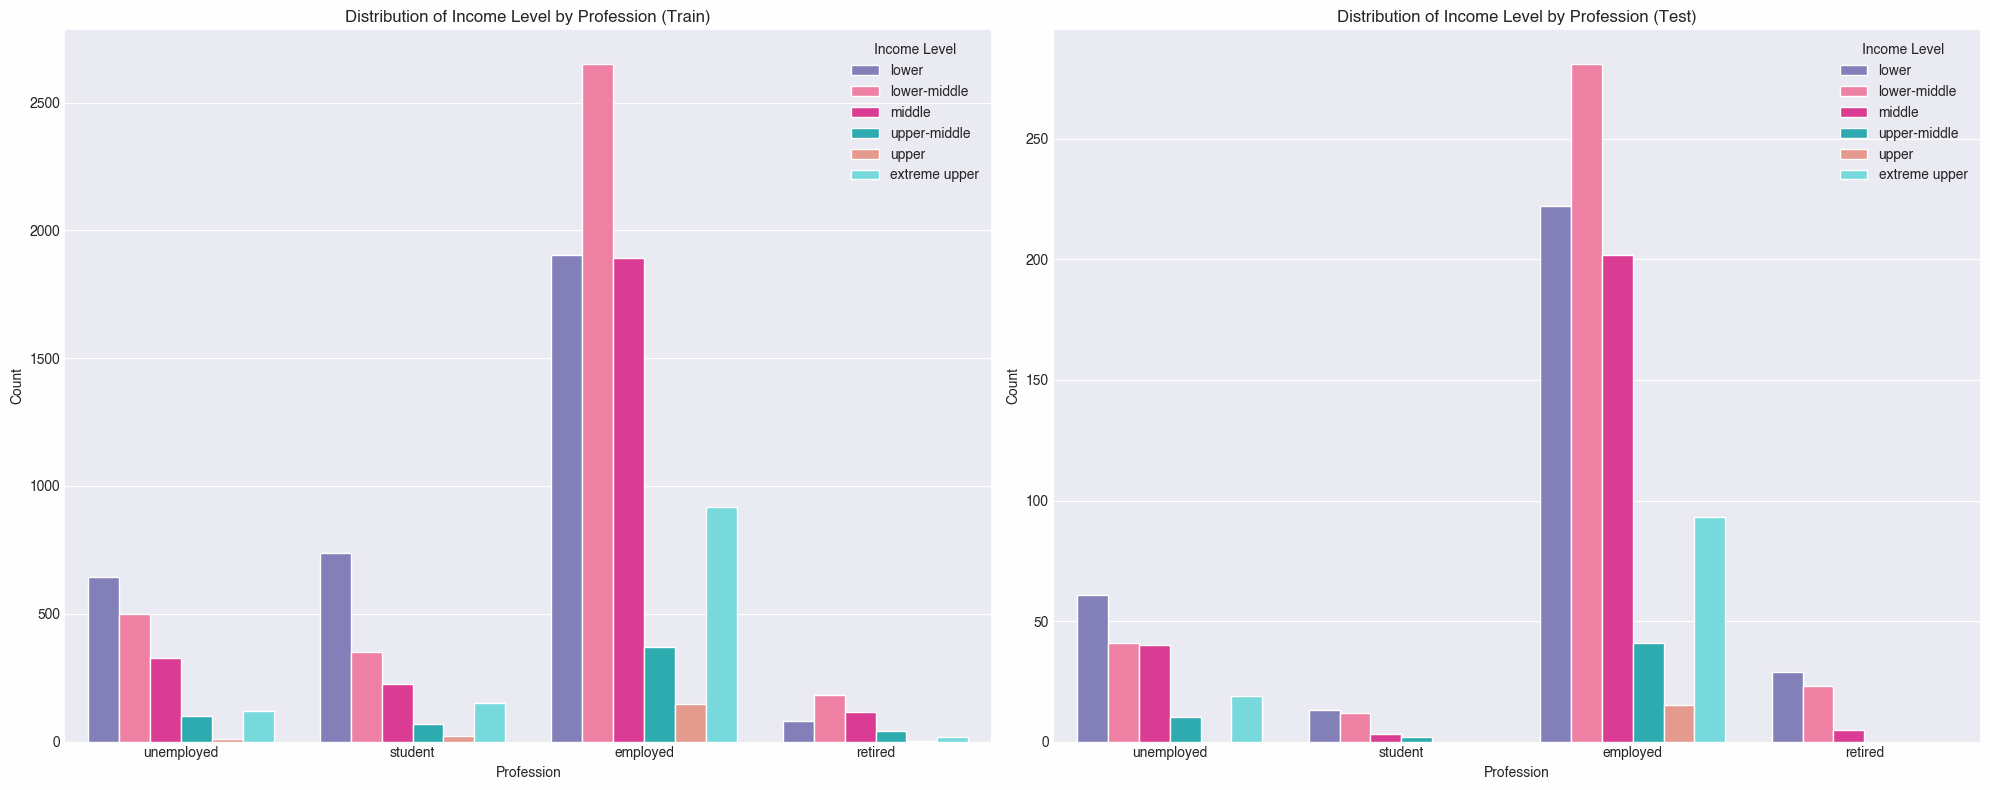

In [277]:
count_plot_by_income(eda_df, eda_df_test, 'profession')

### Profession x Education 

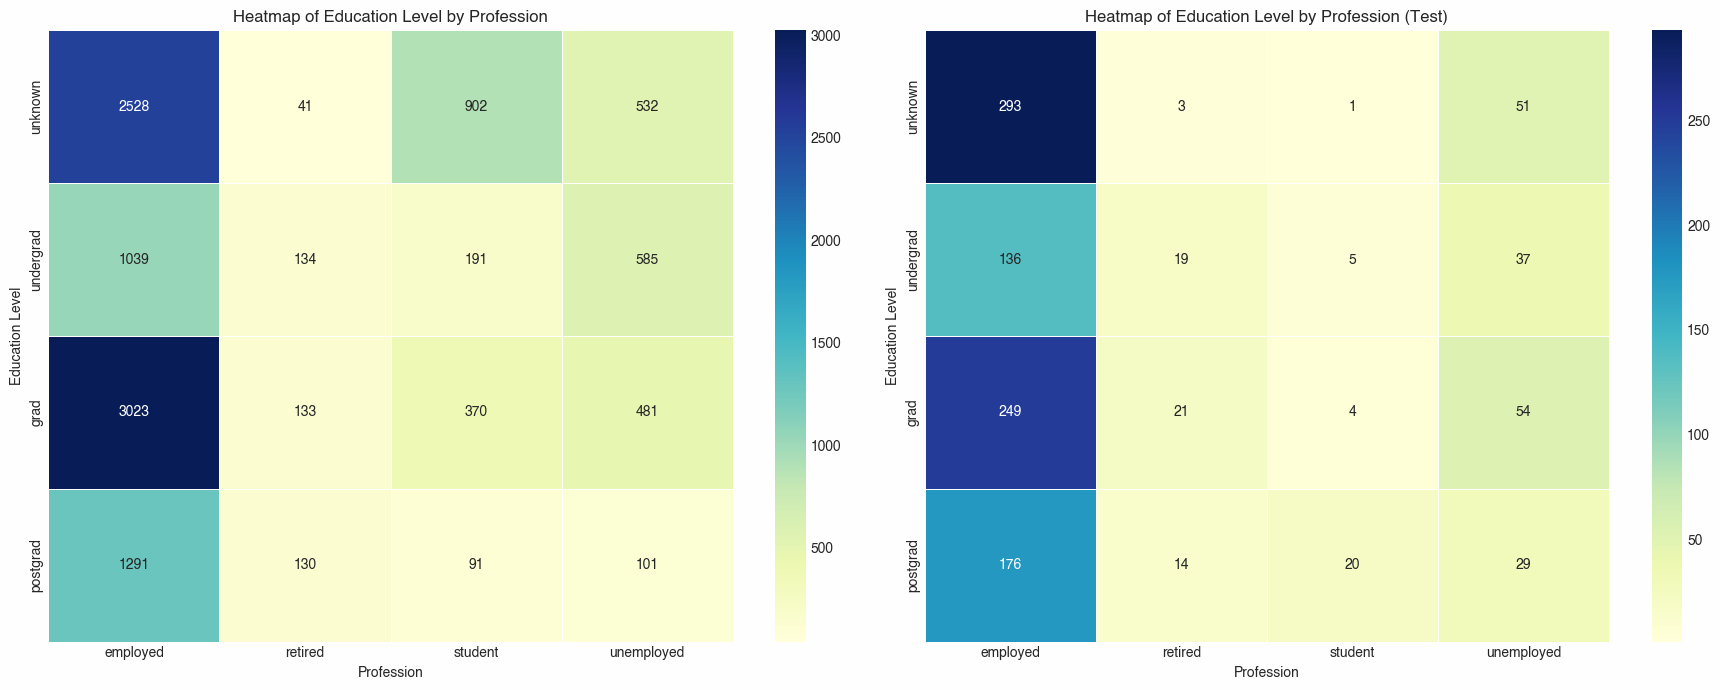

In [278]:

education_order = ['unknown', 'undergrad', 'grad', 'postgrad']

eda_df['education'] = pd.Categorical(eda_df['education'], categories=education_order, ordered=True)
eda_df_test['education'] = pd.Categorical(eda_df_test['education'], categories=education_order, ordered=True)

crosstab1 = pd.crosstab(eda_df['education'], eda_df['profession'], values=eda_df['age'], aggfunc='count')
crosstab2 = pd.crosstab(eda_df_test['education'], eda_df_test['profession'], values=eda_df_test['age'], aggfunc='count')

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for ax, crosstab, title in zip(axes, [crosstab1, crosstab2], ['Heatmap of Education Level by Profession', 'Heatmap of Education Level by Profession (Test)']):
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=.5, ax=ax)
    ax.set_xlabel('Profession')
    ax.set_ylabel('Education Level')
    ax.set_title(title)

plt.tight_layout()
plt.show()


### Marital status x Children

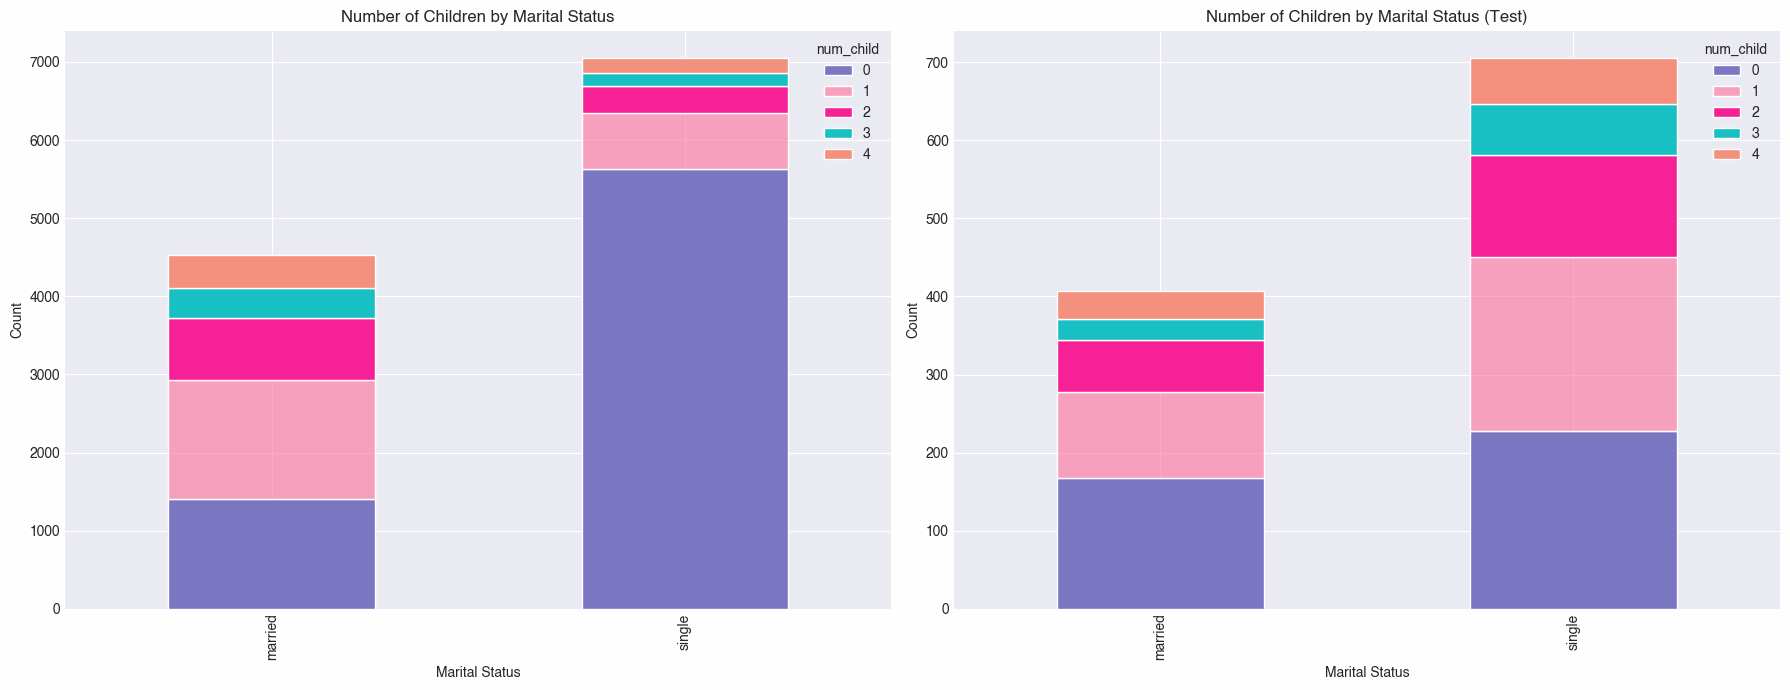

In [279]:

crosstab1 = pd.crosstab(eda_df['marital_status'], eda_df['num_child'])
crosstab2 = pd.crosstab(eda_df_test['marital_status'], eda_df_test['num_child'])

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for ax, crosstab, title in zip(axes, [crosstab1, crosstab2], ['Number of Children by Marital Status', 'Number of Children by Marital Status (Test)']):
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Marital Status')
    ax.set_ylabel('Count')
    ax.set_title(title)

plt.tight_layout()
plt.show()


### Accept x Mean CVR by Mobile Plan

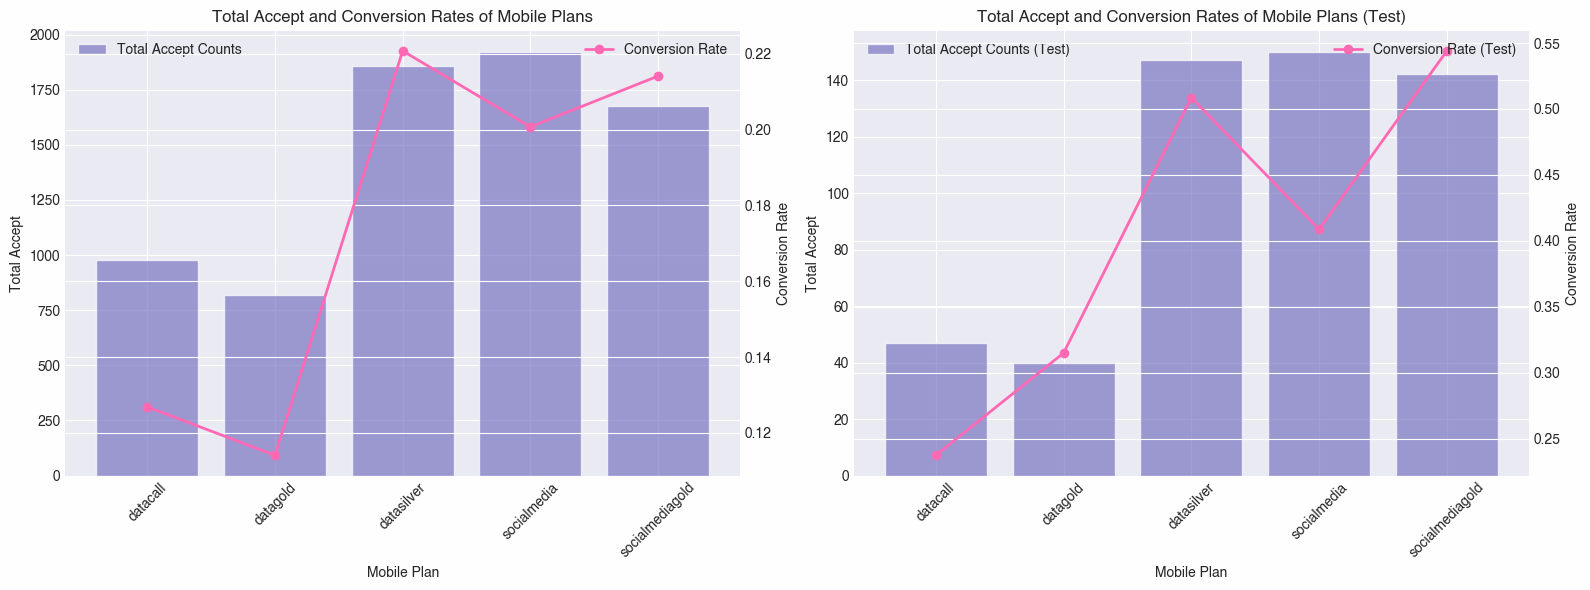

In [280]:
accept_counts1 = mpu.groupby('mobile_plan')['accept'].sum().sort_index()
accept_counts2 = mpu_test.groupby('mobile_plan')['accept'].sum().sort_index()

plan_counts1 = mpu['mobile_plan'].value_counts().sort_index()
conversion_rates1 = accept_counts1 / plan_counts1

plan_counts2 = mpu_test['mobile_plan'].value_counts().sort_index()
conversion_rates2 = accept_counts2 / plan_counts2

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(accept_counts1.index, accept_counts1.values, alpha=0.7, label='Total Accept Counts')
ax1.set_xlabel('Mobile Plan')
ax1.set_ylabel('Total Accept')
ax1.set_title('Total Accept and Conversion Rates of Mobile Plans')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(conversion_rates1.index, conversion_rates1.values, color='hotpink', marker='o', linestyle='-', linewidth=2, label='Conversion Rate')
ax2.set_ylabel('Conversion Rate')
ax2.legend(loc='upper right')

ax3.bar(accept_counts2.index, accept_counts2.values, alpha=0.7, label='Total Accept Counts (Test)')
ax3.set_xlabel('Mobile Plan')
ax3.set_ylabel('Total Accept')
ax3.set_title('Total Accept and Conversion Rates of Mobile Plans (Test)')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(loc='upper left')

ax4 = ax3.twinx()
ax4.plot(conversion_rates2.index, conversion_rates2.values, color='hotpink', marker='o', linestyle='-', linewidth=2, label='Conversion Rate (Test)')
ax4.set_ylabel('Conversion Rate')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Frequency (fb, yt, ins) x Gender

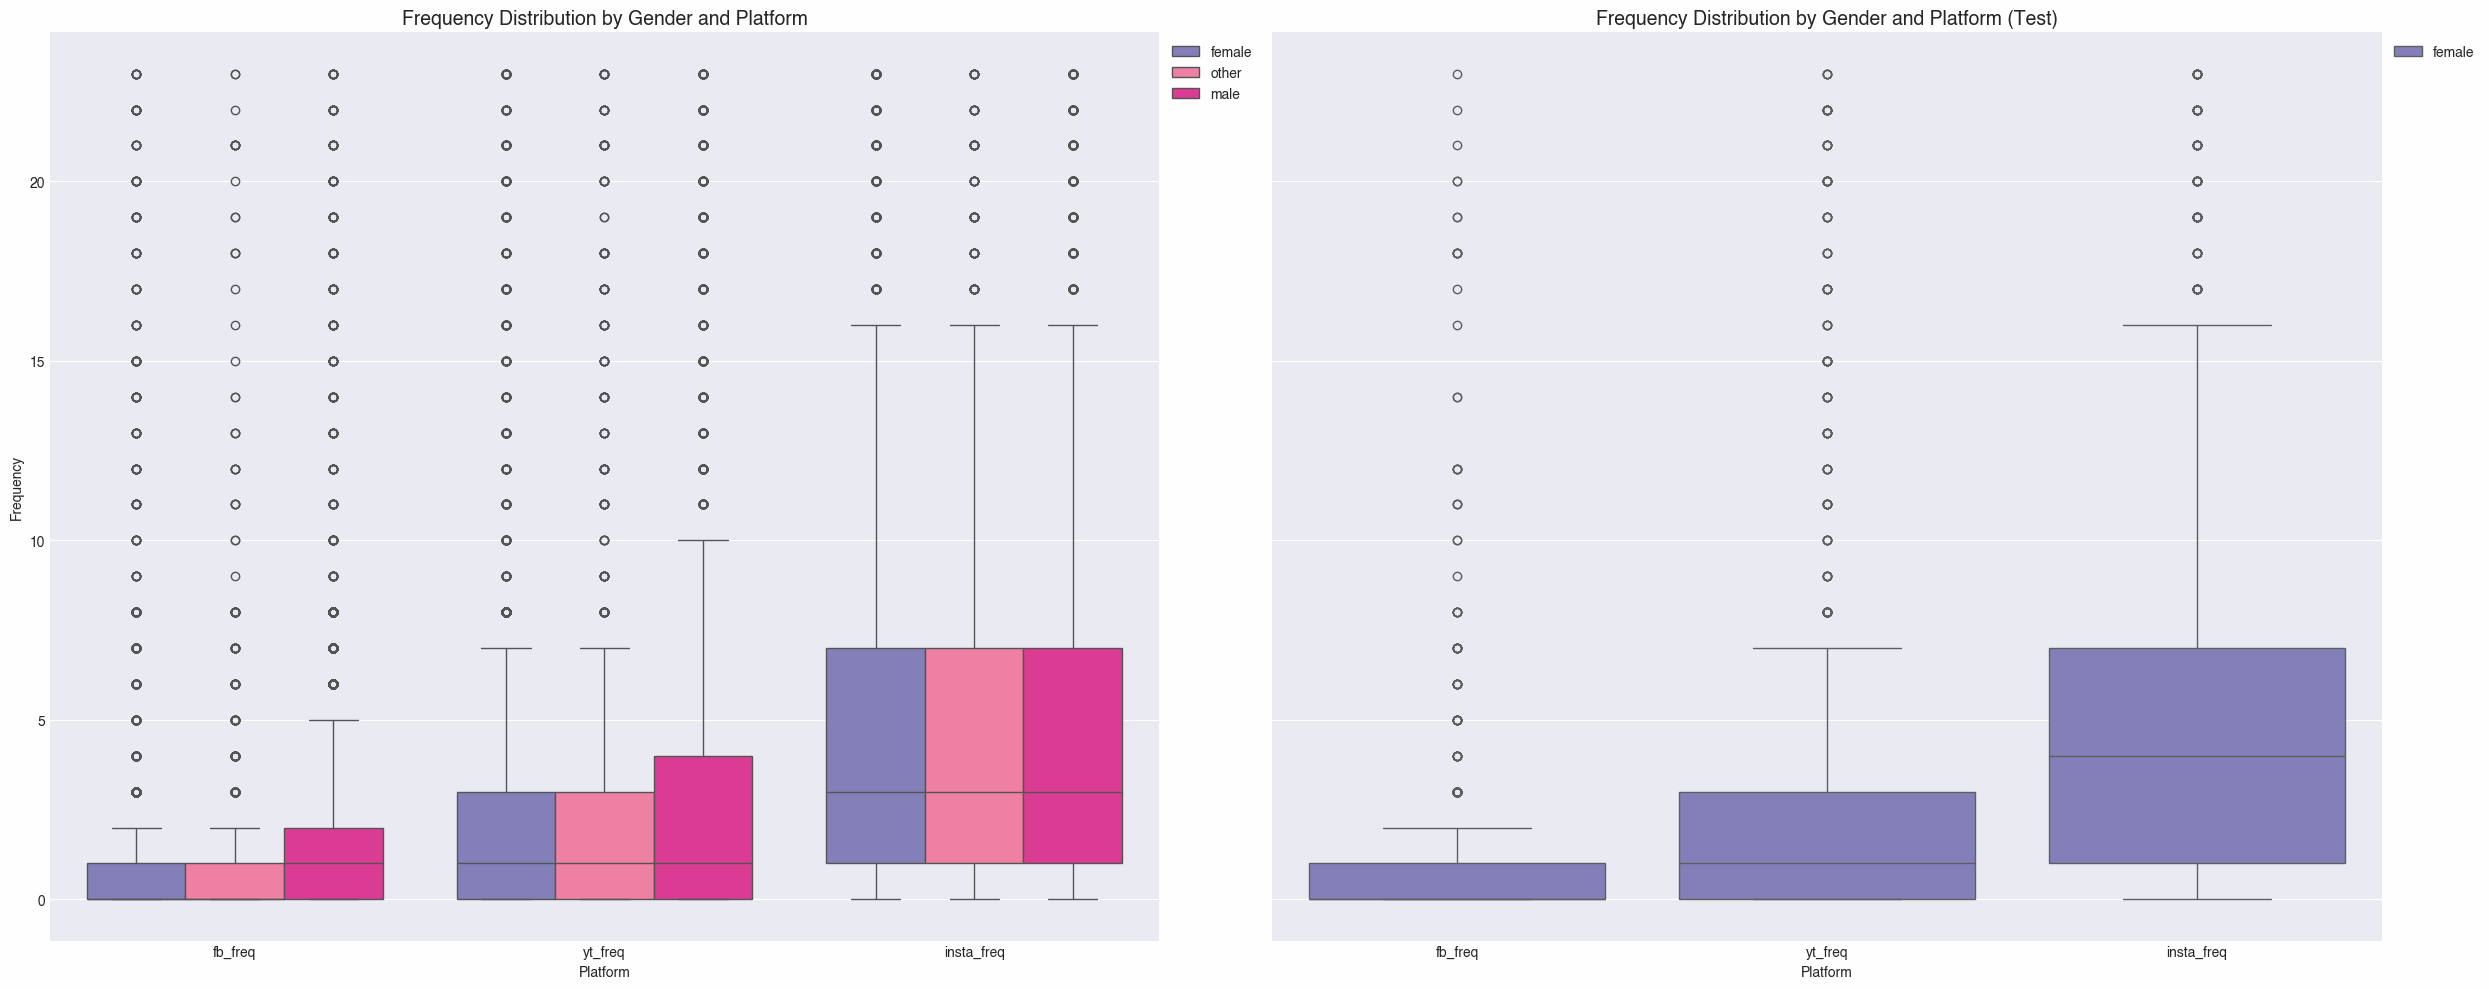

In [281]:

melted_df = eda_df.melt(id_vars=['gender'], value_vars=['fb_freq', 'yt_freq', 'insta_freq'],
                         var_name='platform', value_name='frequency')

melted_df_test = eda_df_test.melt(id_vars=['gender'], value_vars=['fb_freq', 'yt_freq', 'insta_freq'],
                                  var_name='platform', value_name='frequency')

fig, axes = plt.subplots(1, 2, figsize=(25, 10), sharey=True)

# Plot boxplots for training and test sets
for ax, data, title in zip(axes, [melted_df, melted_df_test], 
                           ['Frequency Distribution by Gender and Platform', 
                            'Frequency Distribution by Gender and Platform (Test)']):
    sns.boxplot(x='platform', y='frequency', hue='gender', data=data, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Platform')
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


### ### Gender x Accept x Mean CVR

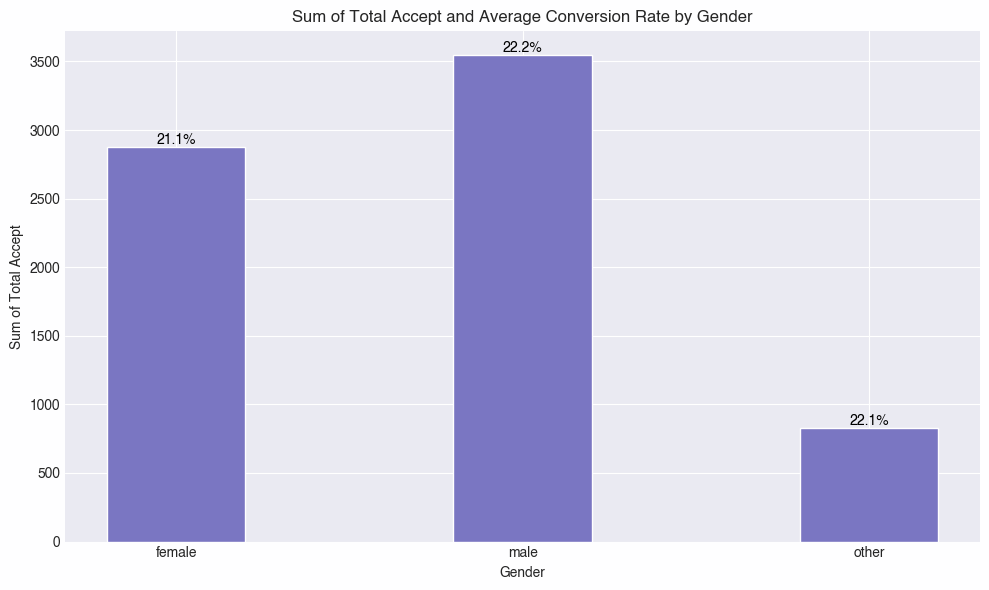

In [282]:

mobile_plan_user_agg = (
    mpu.groupby('id')
    .agg(mobile_plan_recommended=('mobile_plan', 'size'), total_accept=('accept', 'sum'))
    .reset_index()
)
mobile_plan_user_agg['conversion_rate'] = (mobile_plan_user_agg['total_accept'] / mobile_plan_user_agg['mobile_plan_recommended']) * 100

mobile_plan_user_agg_test = (
    mpu_test.groupby('id')
    .agg(mobile_plan_recommended=('mobile_plan', 'size'), total_accept=('accept', 'sum'))
    .reset_index()
)
mobile_plan_user_agg_test['conversion_rate'] = (mobile_plan_user_agg_test['total_accept'] / mobile_plan_user_agg_test['mobile_plan_recommended']) * 100

eda_mobile_plan = eda_df.merge(mobile_plan_user_agg, on='id', how='left')
eda_mobile_plan_test = eda_df_test.merge(mobile_plan_user_agg_test, on='id', how='left')

grouped_data = (
    eda_mobile_plan.groupby('gender')
    .agg(total_accept=('total_accept', 'sum'), conversion_rate=('conversion_rate', 'mean'))
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(grouped_data['gender'], grouped_data['total_accept'], width=0.4, label='Sum of Total Accept')

ax.set_xlabel('Gender')
ax.set_ylabel('Sum of Total Accept')
ax.set_title('Sum of Total Accept and Average Conversion Rate by Gender')

for bar, rate in zip(bars, grouped_data['conversion_rate']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rate:.1f}%', 
            ha='center', va='bottom', color='black', fontsize=10)

fig.tight_layout()
plt.show()


### Age x Accept x Mean CVR

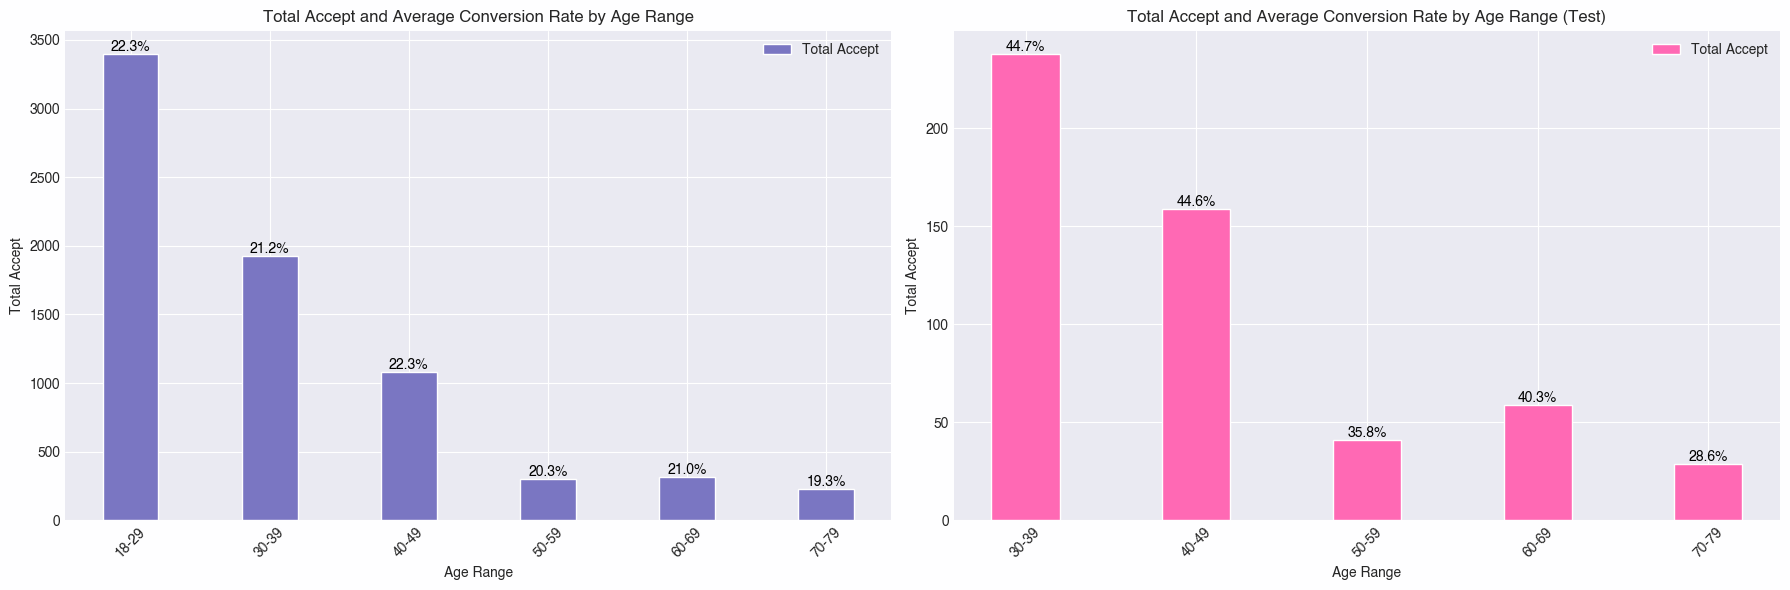

In [283]:

age_ranges = {
    '18-29': (18, 29),
    '30-39': (30, 39),
    '40-49': (40, 49),
    '50-59': (50, 59),
    '60-69': (60, 69),
    '70-79': (70, 79)
}

assign_age_range = lambda age: next((k for k, v in age_ranges.items() if v[0] <= age <= v[1]), 'Unknown')

eda_mobile_plan['age_range'] = eda_mobile_plan['age'].apply(assign_age_range)
grouped_data1 = (
    eda_mobile_plan.groupby('age_range')
    .agg(total_accept=('total_accept', 'sum'), conversion_rate=('conversion_rate', 'mean'))
    .reset_index()
)

eda_mobile_plan_test['age_range'] = eda_mobile_plan_test['age'].apply(assign_age_range)
grouped_data2 = (
    eda_mobile_plan_test.groupby('age_range')
    .agg(total_accept=('total_accept', 'sum'), conversion_rate=('conversion_rate', 'mean'))
    .reset_index()
)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

bars1 = axes[0].bar(grouped_data1['age_range'], grouped_data1['total_accept'], width=0.4, label='Total Accept')
axes[0].set_xlabel('Age Range')
axes[0].set_ylabel('Total Accept')
axes[0].set_title('Total Accept and Average Conversion Rate by Age Range')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

for bar, rate in zip(bars1, grouped_data1['conversion_rate']):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rate:.1f}%', 
                 ha='center', va='bottom', color='black', fontsize=10)

bars2 = axes[1].bar(grouped_data2['age_range'], grouped_data2['total_accept'], width=0.4, label='Total Accept', color='hotpink')
axes[1].set_xlabel('Age Range')
axes[1].set_ylabel('Total Accept')
axes[1].set_title('Total Accept and Average Conversion Rate by Age Range (Test)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

for bar, rate in zip(bars2, grouped_data2['conversion_rate']):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rate:.1f}%', 
                 ha='center', va='bottom', color='black', fontsize=10)

fig.tight_layout()
plt.show()

eda_mobile_plan.drop(columns='age_range', inplace=True)
eda_mobile_plan_test.drop(columns='age_range', inplace=True)


### Income level x Accept x Mean CVR

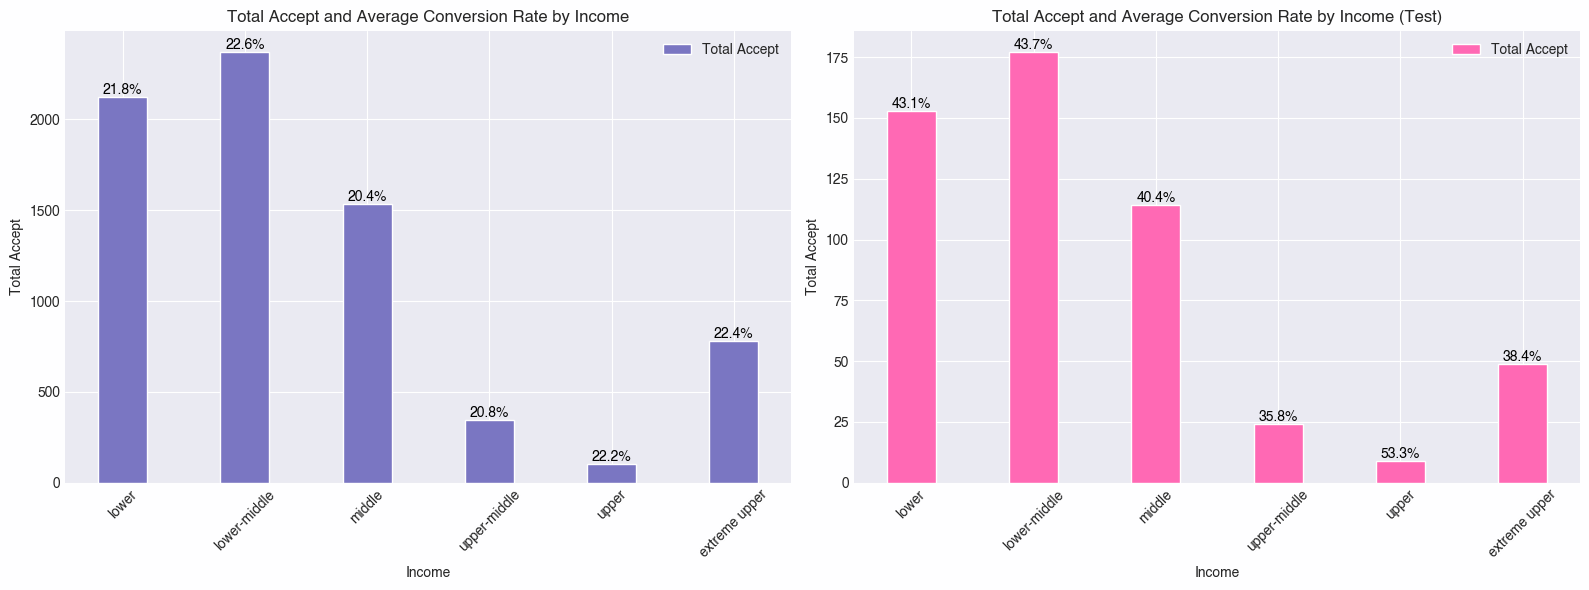

In [284]:


grouped_data1 = (
    eda_mobile_plan.groupby('income')
    .agg(total_accept=('total_accept', 'sum'), conversion_rate=('conversion_rate', 'mean'))
    .reset_index()
)

grouped_data2 = (
    eda_mobile_plan_test.groupby('income')
    .agg(total_accept=('total_accept', 'sum'), conversion_rate=('conversion_rate', 'mean'))
    .reset_index()
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

bars1 = axes[0].bar(grouped_data1['income'], grouped_data1['total_accept'], width=0.4, label='Total Accept')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Total Accept')
axes[0].set_title('Total Accept and Average Conversion Rate by Income')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

for bar, rate in zip(bars1, grouped_data1['conversion_rate']):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rate:.1f}%', 
                 ha='center', va='bottom', color='black', fontsize=10)

bars2 = axes[1].bar(grouped_data2['income'], grouped_data2['total_accept'], width=0.4, label='Total Accept', color='hotpink')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Total Accept')
axes[1].set_title('Total Accept and Average Conversion Rate by Income (Test)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

for bar, rate in zip(bars2, grouped_data2['conversion_rate']):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rate:.1f}%', 
                 ha='center', va='bottom', color='black', fontsize=10)

fig.tight_layout()
plt.show()


### Hành vi sử dụng 4G x Accept


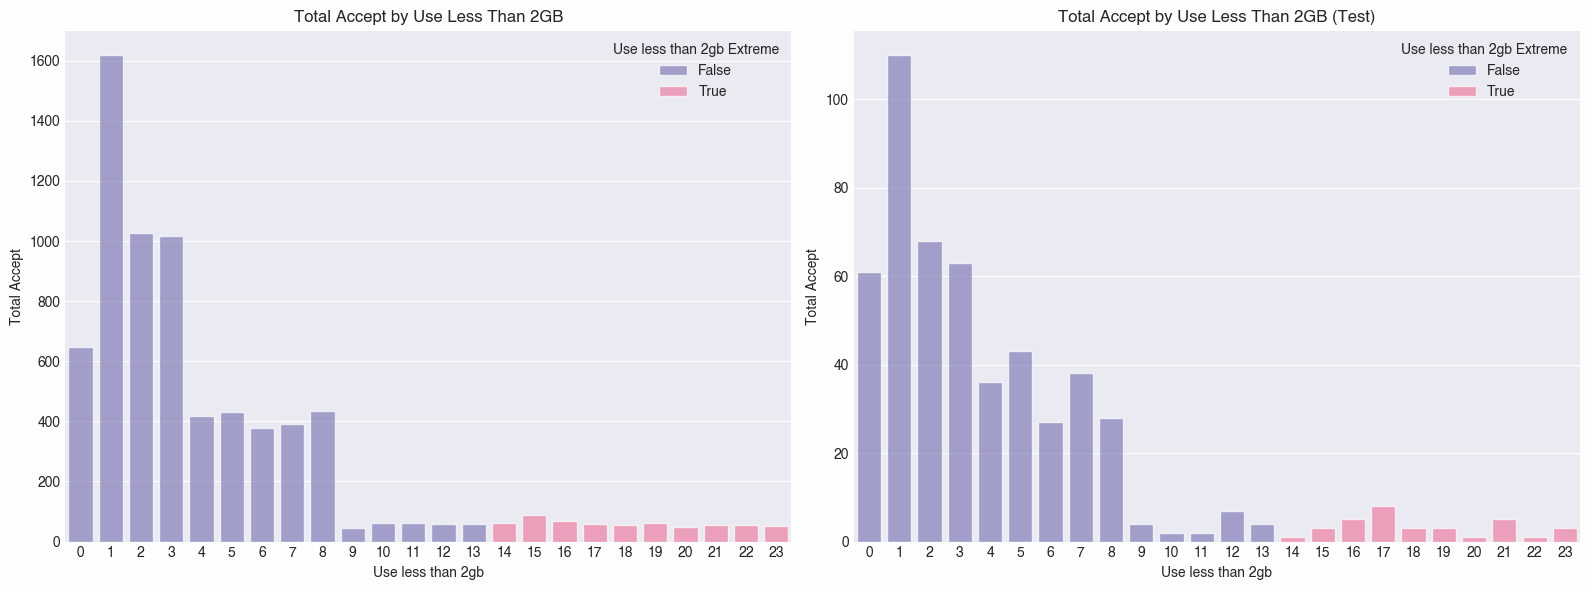

In [285]:


def detect_outliers_iqr(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[column].apply(lambda x: x < lower_bound or x > upper_bound)

def process_and_plot(df1, df2, column, title1, title2):
    for df in [df1, df2]:
        df[f'{column}_ext'] = detect_outliers_iqr(df, column)

    grouped_data1 = df1.groupby([column, f'{column}_ext']).agg(total_accept=('total_accept', 'sum')).reset_index()
    grouped_data2 = df2.groupby([column, f'{column}_ext']).agg(total_accept=('total_accept', 'sum')).reset_index()

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.barplot(x=column, y='total_accept', hue=f'{column}_ext', data=grouped_data1, alpha=0.7, ax=axes[0])
    axes[0].set_xlabel(column.replace('_', ' ').capitalize())
    axes[0].set_ylabel('Total Accept')
    axes[0].set_title(title1)
    axes[0].legend(title=f'{column.replace("_", " ").capitalize()} Extreme')

    sns.barplot(x=column, y='total_accept', hue=f'{column}_ext', data=grouped_data2, alpha=0.7, ax=axes[1])
    axes[1].set_xlabel(column.replace('_', ' ').capitalize())
    axes[1].set_ylabel('Total Accept')
    axes[1].set_title(title2)
    axes[1].legend(title=f'{column.replace("_", " ").capitalize()} Extreme')

    plt.tight_layout()
    plt.show()

process_and_plot(
    eda_mobile_plan, eda_mobile_plan_test, 
    'use_less_than_2GB', 
    'Total Accept by Use Less Than 2GB', 
    'Total Accept by Use Less Than 2GB (Test)'
)


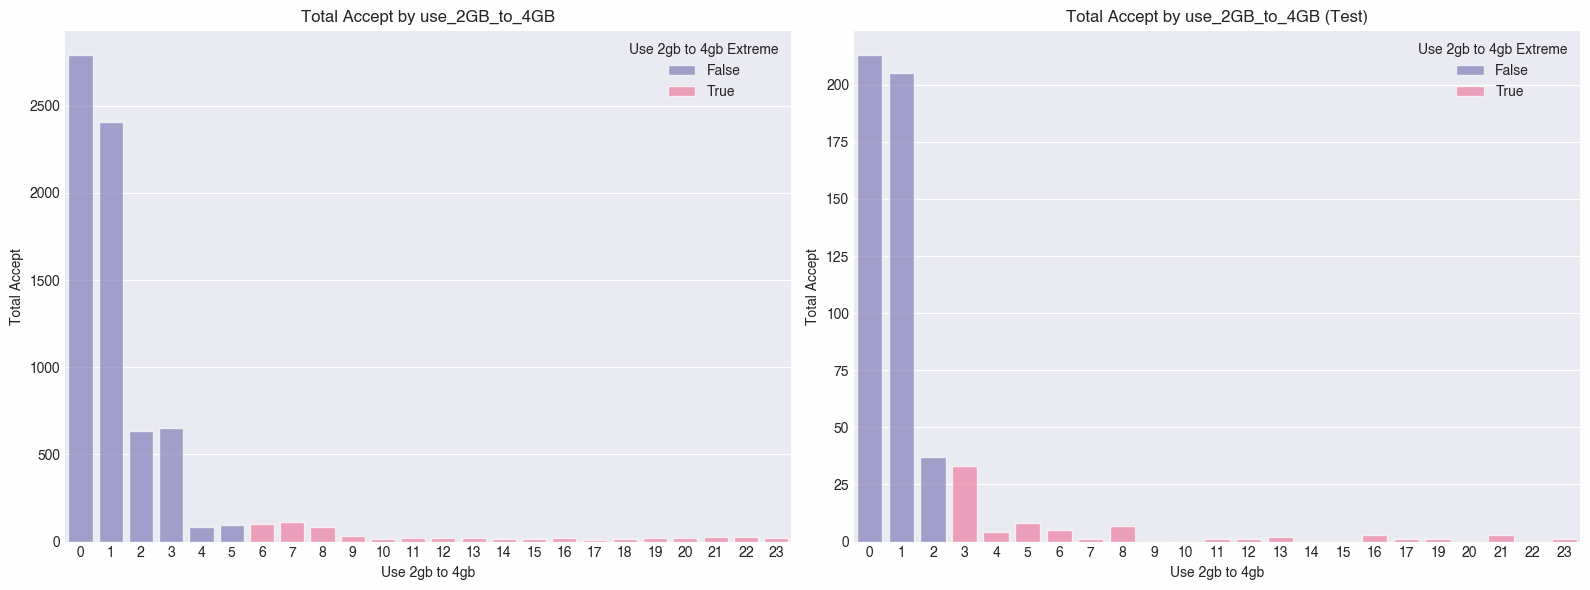

In [286]:
process_and_plot(
    eda_mobile_plan, eda_mobile_plan_test, 
    'use_2GB_to_4GB', 
    'Total Accept by use_2GB_to_4GB', 
    'Total Accept by use_2GB_to_4GB (Test)'
)

### Nhận biết gói Viettel x Direction

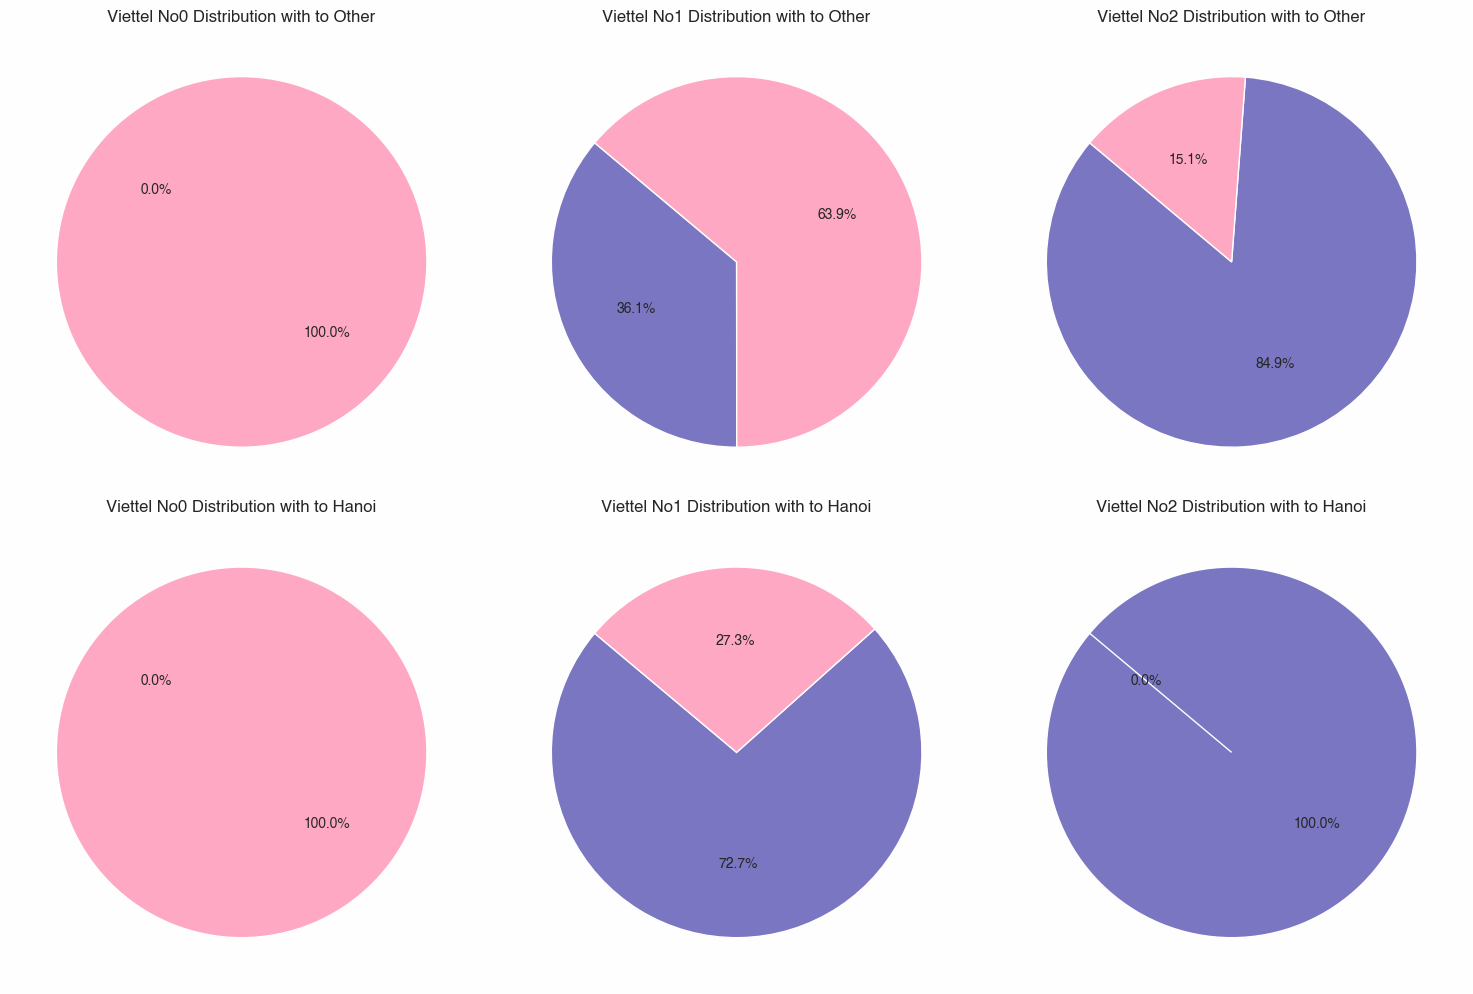

In [287]:

def plot_pie_charts(df, direction_col, viettel_cols, titles):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    for i, viettel_col in enumerate(viettel_cols):
        for j, direction in enumerate([0, 1]):
            sizes = [df[(df[direction_col] == direction) & (df[viettel_col] == 0)].shape[0], 
                     df[(df[direction_col] == direction) & (df[viettel_col] == 1)].shape[0]]
            
            axes[j, i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=140)
            axes[j, i].set_title(titles[j][i])

    plt.tight_layout()
    plt.show()

viettel_columns = ['viettel_no_0', 'viettel_no_1', 'viettel_no_2']
chart_titles = [
    ['Viettel No0 Distribution with to Other', 'Viettel No1 Distribution with to Other', 'Viettel No2 Distribution with to Other'],
    ['Viettel No0 Distribution with to Hanoi', 'Viettel No1 Distribution with to Hanoi', 'Viettel No2 Distribution with to Hanoi']
]

plot_pie_charts(eda_df, 'direction', viettel_columns, chart_titles)


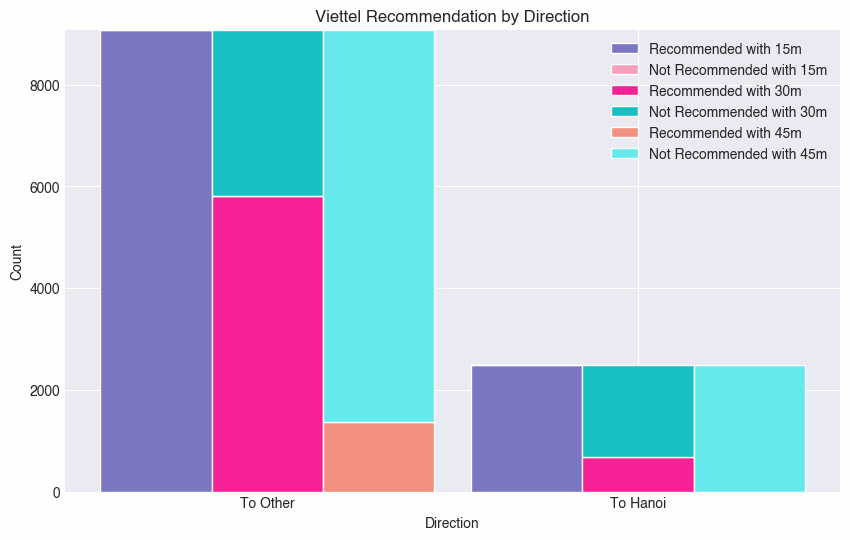

In [288]:

def plot_viettel_recommendation(df, direction_col, viettel_cols, labels):
    df_int = df[[direction_col] + viettel_cols].astype(int)
    grouped_counts = df_int.groupby(direction_col).sum()
    
    bar_width = 0.3
    r = np.arange(len(grouped_counts))
    

    plt.figure(figsize=(10, 6))

    for i, col in enumerate(viettel_cols):
        r_pos = r + i * bar_width
        total_counts = df_int.groupby(direction_col)[col].count()
        
        plt.bar(r_pos, grouped_counts[col], width=bar_width, label=f'Recommended with {labels[i]}')
        plt.bar(r_pos, total_counts - grouped_counts[col], bottom=grouped_counts[col], 
                width=bar_width, label=f'Not Recommended with {labels[i]}')


    plt.xlabel('Direction')
    plt.xticks(r + bar_width, ['To Other', 'To Hanoi'])
    plt.ylabel('Count')
    plt.title('Viettel Recommendation by Direction')
    plt.legend()
    plt.show()

viettel_columns = ['viettel_no_0', 'viettel_no_1', 'viettel_no_2']
recommendation_labels = ['15m', '30m', '45m']

plot_viettel_recommendation(eda_df, 'direction', viettel_columns, recommendation_labels)


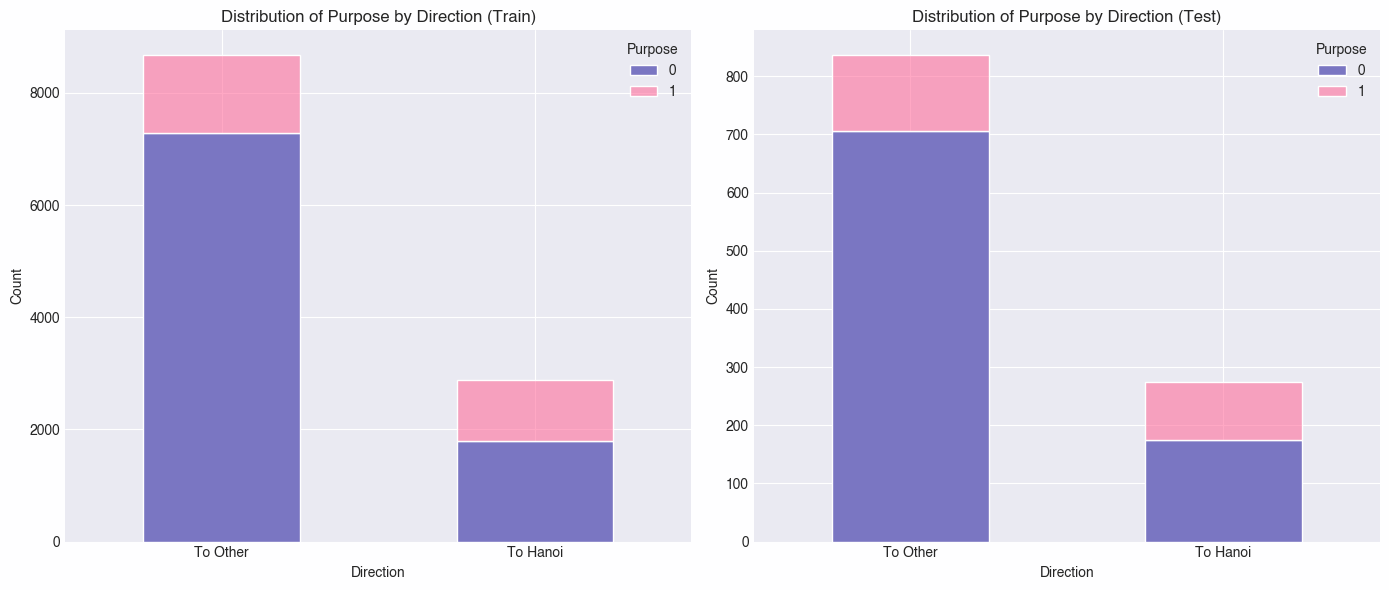

In [289]:


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

counts_train = eda_df.groupby(['purpose', 'direction']).size().unstack(fill_value=0)
counts_test = eda_df_test.groupby(['purpose', 'direction']).size().unstack(fill_value=0)

counts_train.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Distribution of Purpose by Direction (Train)')
axes[0].set_xlabel('Direction')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['To Other', 'To Hanoi'], rotation=0)
axes[0].legend(title='Purpose')

counts_test.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Distribution of Purpose by Direction (Test)')
axes[1].set_xlabel('Direction')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['To Other', 'To Hanoi'], rotation=0)
axes[1].legend(title='Purpose')

plt.tight_layout()
plt.show()
